In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/sample_data/application_data...csv')
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,House / apartment,26,2,10,Laborers,2,0.083037,0.262949,0.139376,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,House / apartment,46,3,3,Core staff,1,0.311267,0.622246,NaN,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,House / apartment,52,1,12,Laborers,2,NaN,0.555912,0.729567,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,House / apartment,52,8,27,Laborers,2,NaN,0.650442,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,House / apartment,55,8,12,Core staff,2,NaN,0.322738,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [ ]:
data['REGION_RATING_CLIENT_W_CITY'] = data['REGION_RATING_CLIENT_W_CITY'].replace({
    1: 'low',
    2: 'median',
    3: 'high'
})

# Tiến hành xử lý missing value

In [ ]:
# PHẦN 1: KIỂM TRA VÀ XỬ LÝ MISSING VALUE
print("PHẦN 1: KIỂM TRA VÀ XỬ LÝ MISSING VALUE")
# In ra % missing
print("\n TỶ LỆ MISSING CỦA CÁC BIẾN:")
missing_percent = data.isnull().sum() / len(data) * 100
missing_data = missing_percent[missing_percent > 0]
if len(missing_data) > 0:
    for col, percent in missing_data.items():
        print(f"{col}: {percent:.2f}%")
else:
    print("Không có biến nào bị missing")

# Phân loại biến
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"\n Tổng số biến: {data.shape[1]}")
print(f" Biến số: {len(num_cols)} biến")
print(f" Biến phân loại: {len(cat_cols)} biến")

PHẦN 1: KIỂM TRA VÀ XỬ LÝ MISSING VALUE

 TỶ LỆ MISSING CỦA CÁC BIẾN:
AMT_ANNUITY: 0.00%
AMT_GOODS_PRICE: 0.09%
OCCUPATION_TYPE: 31.35%
EXT_SOURCE_1: 56.38%
EXT_SOURCE_2: 0.21%
EXT_SOURCE_3: 19.83%
AMT_REQ_CREDIT_BUREAU_YEAR: 13.50%

 Tổng số biến: 23
 Biến số: 13 biến
 Biến phân loại: 10 biến


In [ ]:
# Xử lý missing
# Biến số: điền median
for col in num_cols:
    if col in missing_data.index:
        median_val = data[col].median()
        data[col] = data[col].fillna(median_val)
        print(f" {col}: Điền median = {median_val:.2f}")
data['OCCUPATION_TYPE'].fillna('Missing', inplace=True)

# Kiểm tra lại
print("\nKIỂM TRA SAU KHI XỬ LÝ MISSING:")
if data.isnull().sum().sum() == 0:
    print(" Không còn missing value nào")
else:
    print(f" Còn {data.isnull().sum().sum()} giá trị missing")
    print(data.isnull().sum()[data.isnull().sum() > 0])

 AMT_ANNUITY: Điền median = 24903.00
 AMT_GOODS_PRICE: Điền median = 450000.00
 EXT_SOURCE_1: Điền median = 0.51
 EXT_SOURCE_2: Điền median = 0.57
 EXT_SOURCE_3: Điền median = 0.54
 AMT_REQ_CREDIT_BUREAU_YEAR: Điền median = 1.00

KIỂM TRA SAU KHI XỬ LÝ MISSING:
 Không còn missing value nào


In [ ]:
df = data.copy()

In [ ]:
df.describe()

NameError: name 'df' is not defined

# KHAI PHÁ DỮ LIỆU

In [ ]:
# Thiết lập giao diện đồ thị
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'  # Hoặc 'Arial', 'Tahoma', 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

PHÂN TÍCH MÔ TẢ - DỰ BÁO RỦI RO TÀI CHÍNH
 PHÂN TÍCH ĐƠN BIẾN
\ PHÂN TÍCH BIẾN MỤC TIÊU (TARGET)
--------------------------------------------------
Số lượng biến TARGET:
• 0 (Trả nợ đúng hạn): 258234
• 1 (Gặp khó khăn trả nợ): 258234
Phân phối biến TARGET:
• 0 (Trả nợ đúng hạn): 91.91%
• 1 (Gặp khó khăn trả nợ): 8.09%


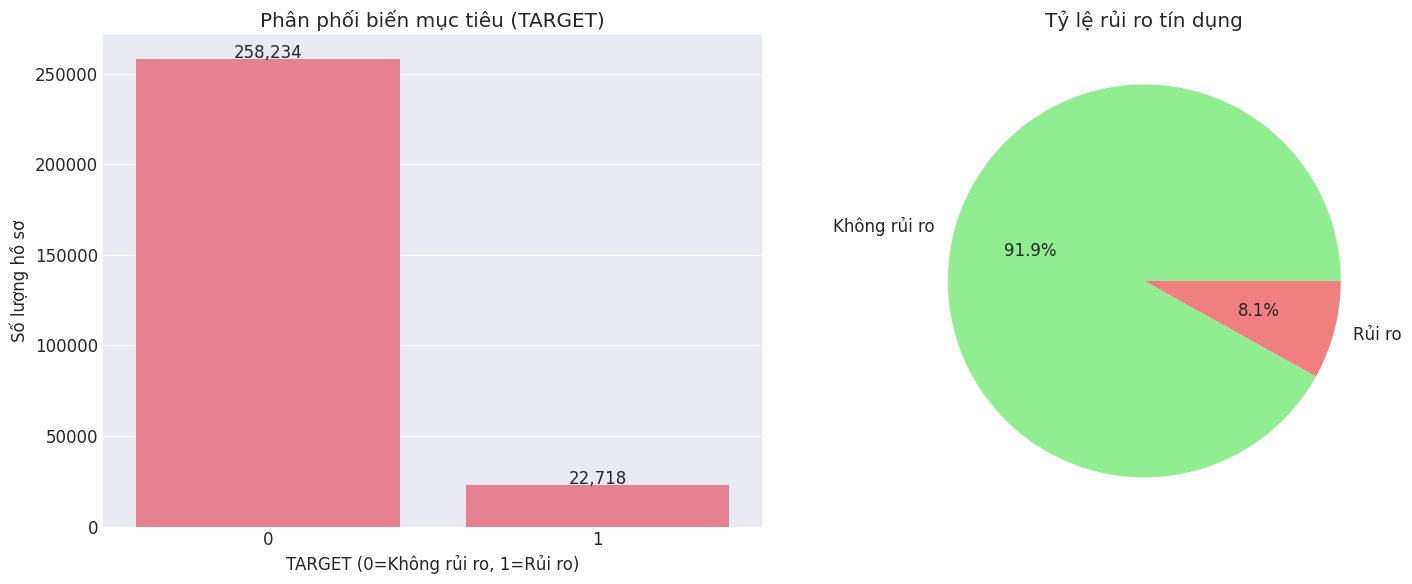

In [ ]:
print("="*80)
print("PHÂN TÍCH MÔ TẢ - DỰ BÁO RỦI RO TÀI CHÍNH")
print("="*80)

print(" PHÂN TÍCH ĐƠN BIẾN")

print("\ PHÂN TÍCH BIẾN MỤC TIÊU (TARGET)")
print("-"*50)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Số lượng (count) cho biểu đồ cột
target_count = df['TARGET'].value_counts().sort_index()
print("Số lượng biến TARGET:")
print(f"• 0 (Trả nợ đúng hạn): {target_count[0]:}")
print(f"• 1 (Gặp khó khăn trả nợ): {target_count[0]:}")
# Tỷ lệ (%) cho biểu đồ tròn
target_dist = df['TARGET'].value_counts(normalize=True).sort_index() * 100

print("Phân phối biến TARGET:")
print(f"• 0 (Trả nợ đúng hạn): {target_dist[0]:.2f}%")
print(f"• 1 (Gặp khó khăn trả nợ): {target_dist[1]:.2f}%")

# biểu đồ cột
sns.barplot(x=target_count.index, y=target_count.values, ax=axes[0])
axes[0].set_title('Phân phối biến mục tiêu (TARGET)')
axes[0].set_xlabel('TARGET (0=Không rủi ro, 1=Rủi ro)')
axes[0].set_ylabel('Số lượng hồ sơ')

for i, v in enumerate(target_count.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center')

# biểu đồ tròn
axes[1].pie(
    target_dist.values,
    labels=['Không rủi ro', 'Rủi ro'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral']
)
axes[1].set_title('Tỷ lệ rủi ro tín dụng')

plt.tight_layout()

plt.show()


PHÂN TÍCH BIẾN PHÂN LOẠI
--------------------------------------------------


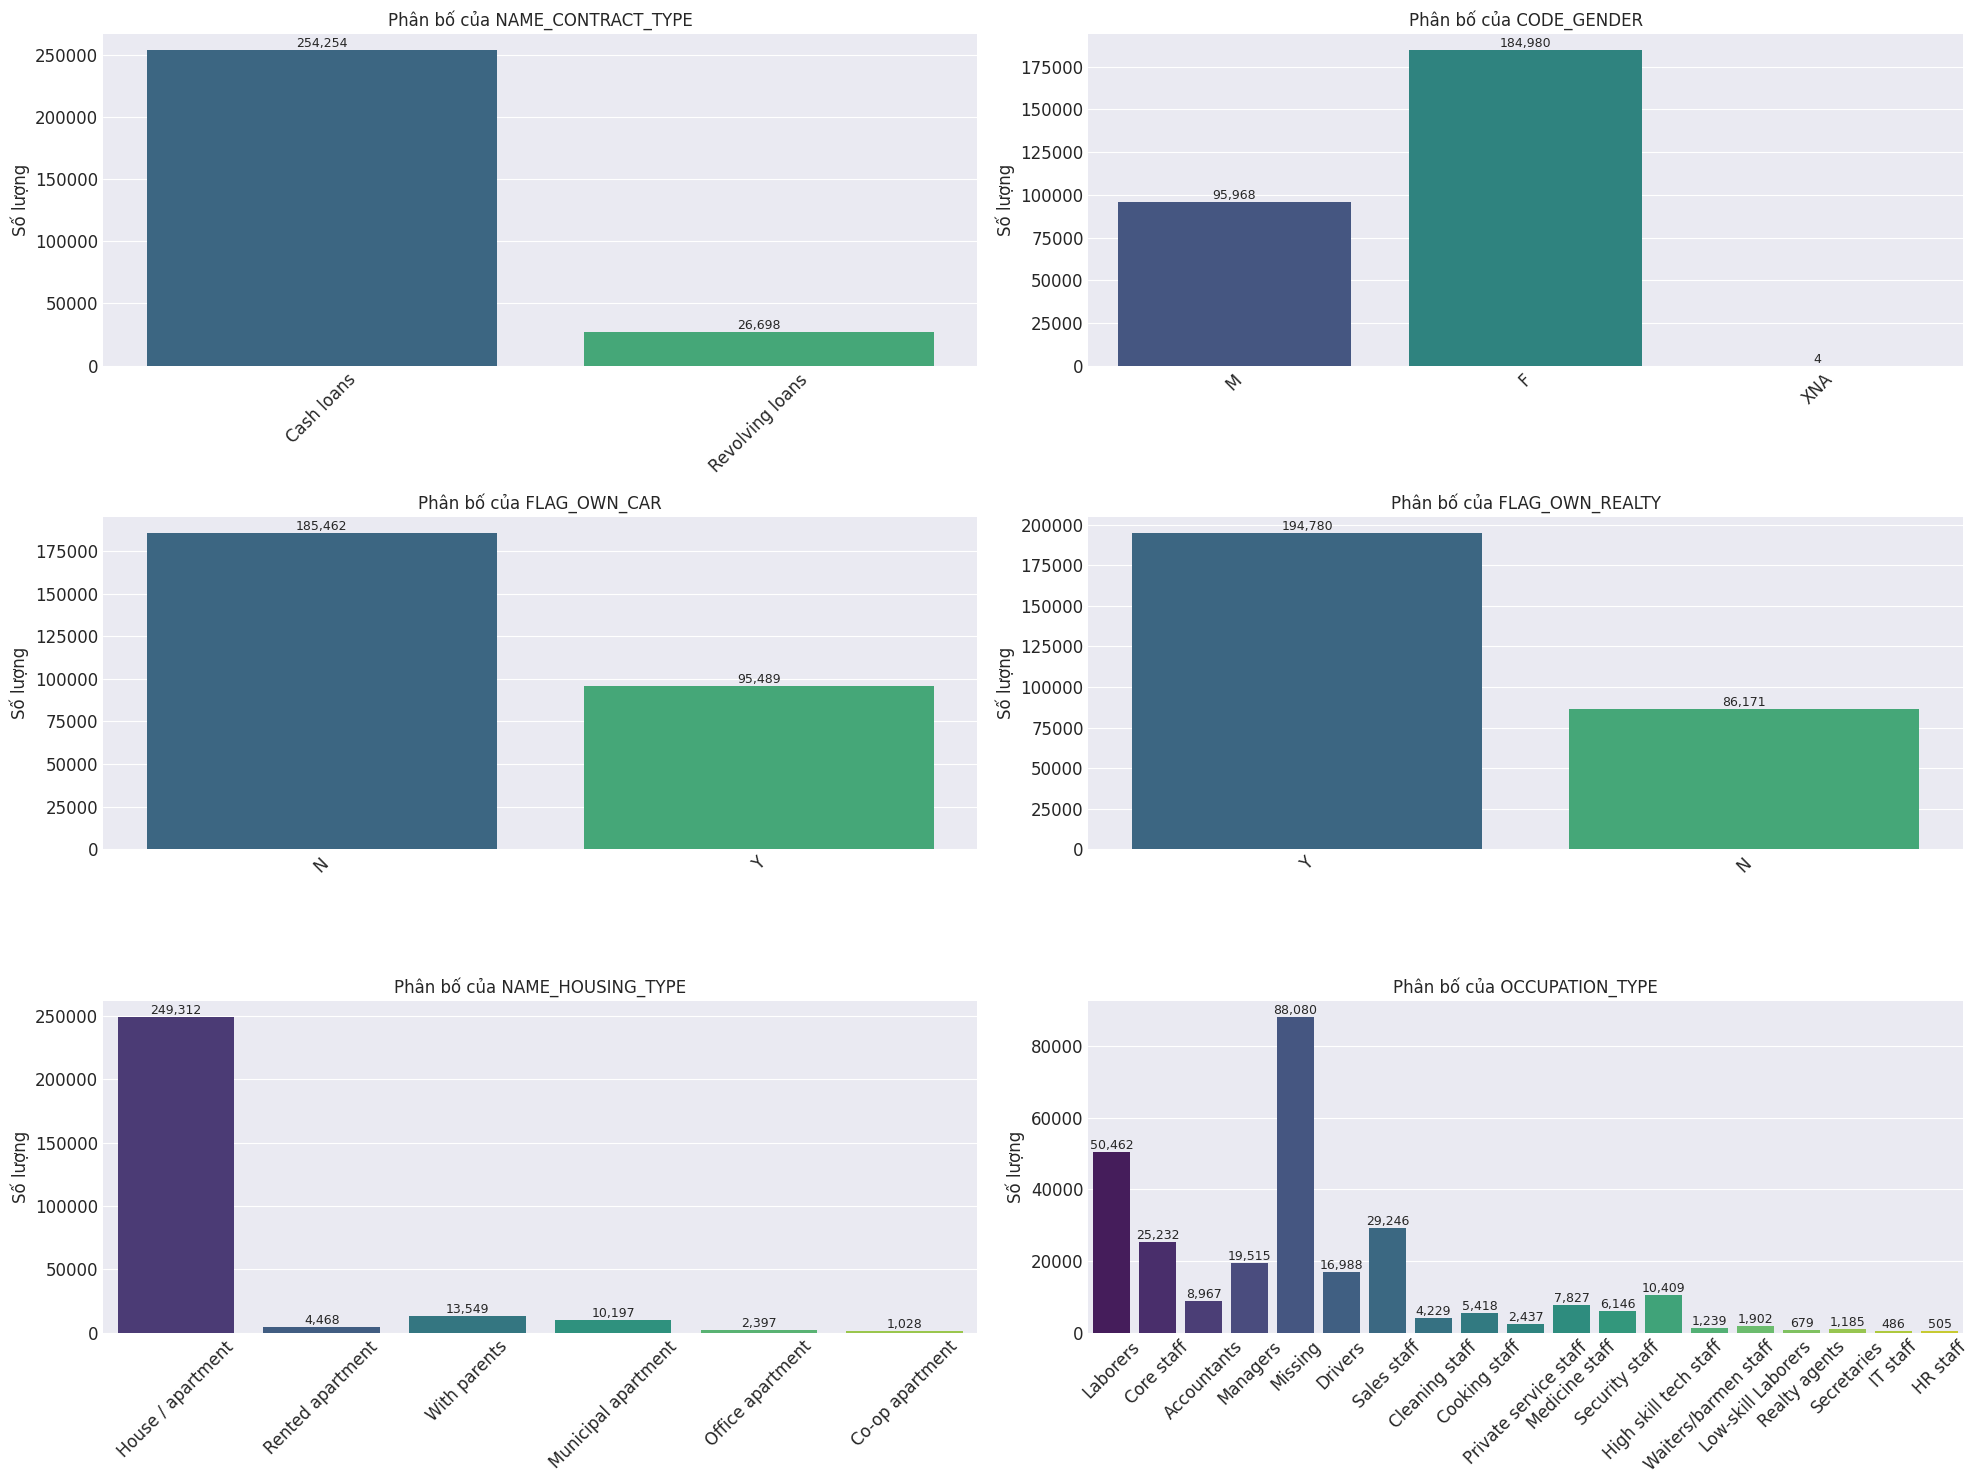

In [ ]:
print("\nPHÂN TÍCH BIẾN PHÂN LOẠI")
print("-" * 50)
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

# Lọc các cột có trong dataframe
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Tính số hàng và cột cho subplots
n_cols = 2  # 2 cột
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Tính số hàng cần thiết

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]

    # Vẽ countplot của seaborn
    sns.countplot(data=df, x=col, ax=ax, palette='viridis')

    ax.set_title(f'Phân bố của {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Số lượng')
    ax.tick_params(axis='x', rotation=45)

    # Thêm số trên các cột
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=9)

# Ẩn các subplot không sử dụng
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


PHÂN TÍCH BIẾN PHÂN LOẠI
--------------------------------------------------

NAME_CONTRACT_TYPE:
  • Revolving loans: 5.52% rủi ro
  • Cash loans: 8.36% rủi ro

CODE_GENDER:
  • XNA: 0.00% rủi ro
  • F: 7.01% rủi ro
  • M: 10.16% rủi ro

FLAG_OWN_CAR:
  • Y: 7.23% rủi ro
  • N: 8.52% rủi ro

FLAG_OWN_REALTY:
  • Y: 7.99% rủi ro
  • N: 8.29% rủi ro

NAME_HOUSING_TYPE:
  • Office apartment: 6.59% rủi ro
  • House / apartment: 7.81% rủi ro
  • Co-op apartment: 8.27% rủi ro
  • Municipal apartment: 8.52% rủi ro
  • With parents: 11.59% rủi ro
  • Rented apartment: 12.42% rủi ro

OCCUPATION_TYPE:
  • Accountants: 5.00% rủi ro
  • High skill tech staff: 6.24% rủi ro
  • Managers: 6.26% rủi ro
  • Core staff: 6.28% rủi ro
  • Missing: 6.53% rủi ro
  • HR staff: 6.53% rủi ro
  • IT staff: 6.58% rủi ro
  • Private service staff: 6.61% rủi ro
  • Medicine staff: 6.72% rủi ro
  • Secretaries: 7.00% rủi ro
  • Realty agents: 8.10% rủi ro
  • Cleaning staff: 9.62% rủi ro
  • Sales staff: 9.63% rủi

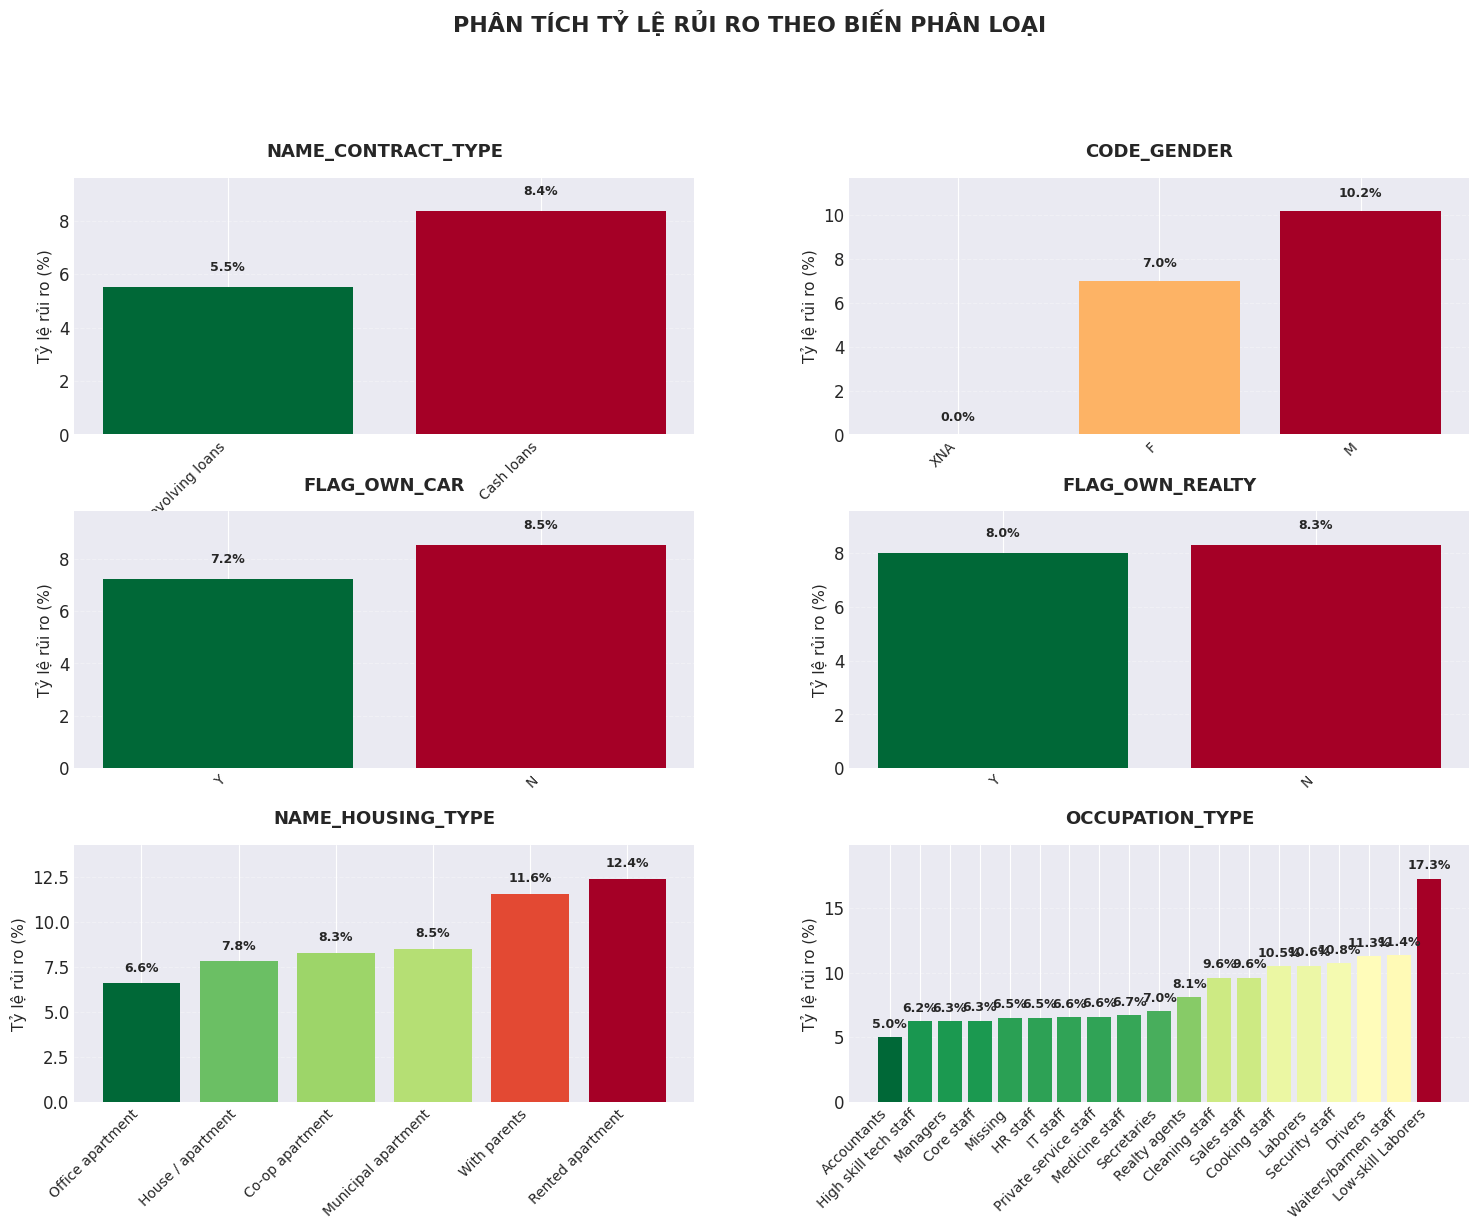

In [ ]:
print("\nPHÂN TÍCH BIẾN PHÂN LOẠI")
print("-" * 50)
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

# Lọc các cột có trong dataframe
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Tạo figure với grid layout
fig = plt.figure(figsize=(18, 12))
fig.suptitle('PHÂN TÍCH TỶ LỆ RỦI RO THEO BIẾN PHÂN LOẠI',
             fontsize=16, fontweight='bold', y=1.02)

# Tạo gridspec để kiểm soát layout tốt hơn
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.25)

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_pos = idx % 2
    ax = fig.add_subplot(gs[row, col_pos])

    # Tính tỷ lệ rủi ro (%)
    risk_by_category = df.groupby(col)['TARGET'].mean().sort_values() * 100

    # Chọn màu sắc (xanh cho tỷ lệ thấp, đỏ cho tỷ lệ cao)
    colors = plt.cm.RdYlGn_r((risk_by_category.values - risk_by_category.values.min()) /
                             (risk_by_category.values.max() - risk_by_category.values.min() + 1e-10))

    # Vẽ biểu đồ
    bars = ax.bar(range(len(risk_by_category)), risk_by_category.values, color=colors)

    # Cài đặt tiêu đề và nhãn
    ax.set_title(f'{col}', fontsize=13, fontweight='bold', pad=15)
    ax.set_xticks(range(len(risk_by_category)))
    ax.set_xticklabels(risk_by_category.index.astype(str), rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Tỷ lệ rủi ro (%)', fontsize=11)

    # Thêm grid
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')

    # Ghi giá trị trên từng cột
    for i, (bar, value) in enumerate(zip(bars, risk_by_category.values)):
        ax.text(
            i,
            bar.get_height() + 0.5,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

    # Đặt giới hạn trục y để có không gian cho text
    ax.set_ylim(0, risk_by_category.values.max() * 1.15)

    # In kết quả phân tích
    print(f"\n{col}:")
    for cat, risk in risk_by_category.items():
        print(f"  • {cat}: {risk:.2f}% rủi ro")

plt.tight_layout()
plt.show()

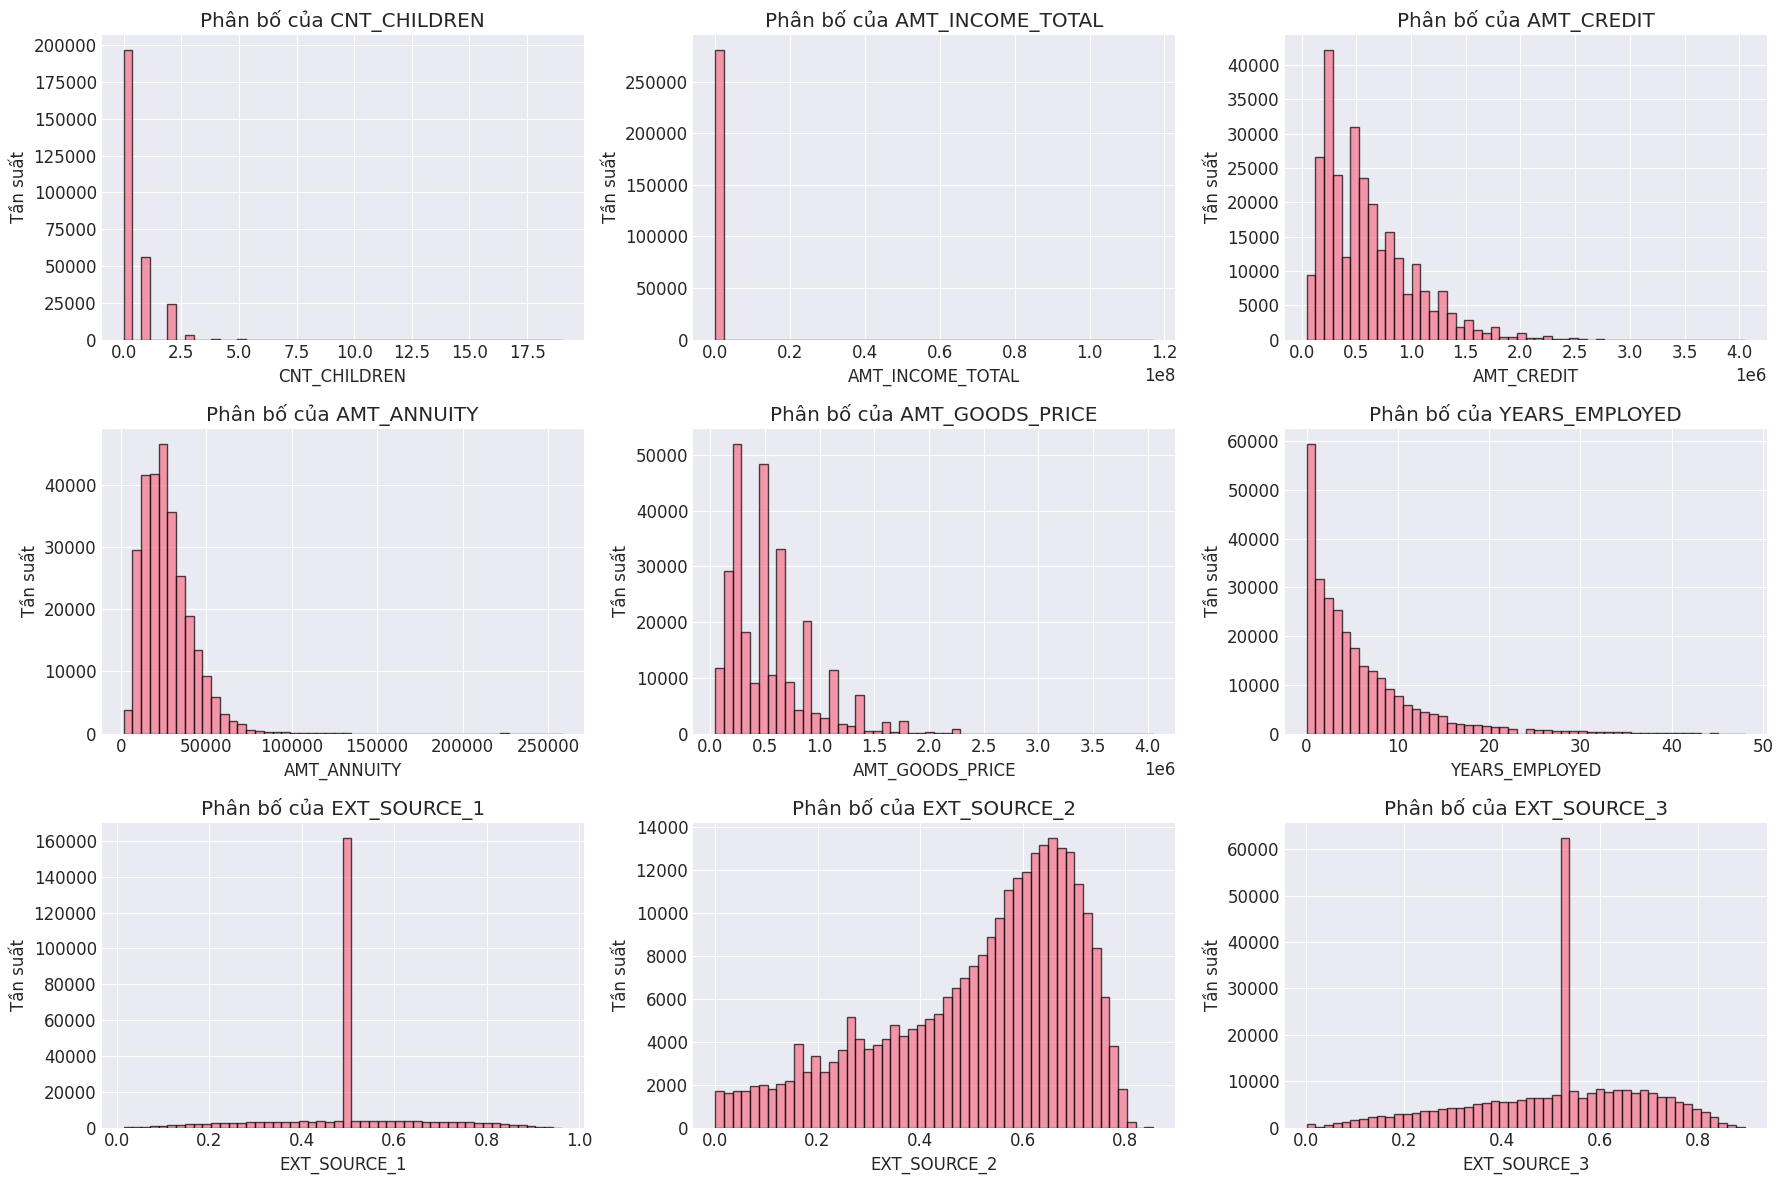

In [ ]:
important_numeric = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'YEARS_EMPLOYED', 'EXT_SOURCE_1',
    'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(18, 12)
)

axes = axes.flatten()

for i, col in enumerate(important_numeric):
    data = df[col].dropna()

    axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Phân bố của {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()



3. PHÂN TÍCH ĐA BIẾN

 TƯƠNG TÁC GIỮA CÁC BIẾN PHÂN LOẠI
--------------------------------------------------

 Giới tính × Sở hữu ô tô theo TARGET
                          Không rủi ro (0)  Rủi ro (1)
CODE_GENDER FLAG_OWN_CAR                              
F           N                       139420       11064
            Y                        40477        2484
M           N                        37923        5430
            Y                        52157        4754


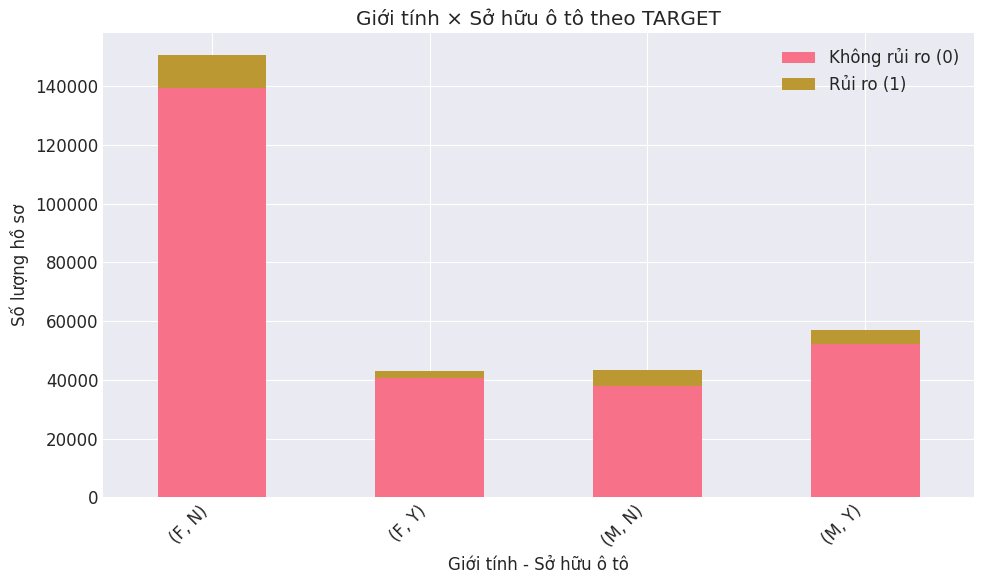

In [ ]:
print("\n" + "="*80)
print("3. PHÂN TÍCH ĐA BIẾN")
print("="*80)

print("\n TƯƠNG TÁC GIỮA CÁC BIẾN PHÂN LOẠI")
print("-"*50)
filtered_df = df[
    (df['CODE_GENDER'].isin(['M', 'F'])) &
    (df['FLAG_OWN_CAR'].notnull())
]

ct_gender_car = pd.crosstab(
    [filtered_df['CODE_GENDER'], filtered_df['FLAG_OWN_CAR']],
    filtered_df['TARGET']
)

ct_gender_car.columns = ['Không rủi ro (0)', 'Rủi ro (1)']

print("\n Giới tính × Sở hữu ô tô theo TARGET")
print(ct_gender_car)
#biểu đồ
ct_gender_car[['Không rủi ro (0)', 'Rủi ro (1)']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title('Giới tính × Sở hữu ô tô theo TARGET')
plt.xlabel('Giới tính - Sở hữu ô tô')
plt.ylabel('Số lượng hồ sơ')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

\PHÂN PHỐI CÁC BIẾN SỐ
--------------------------------------------------


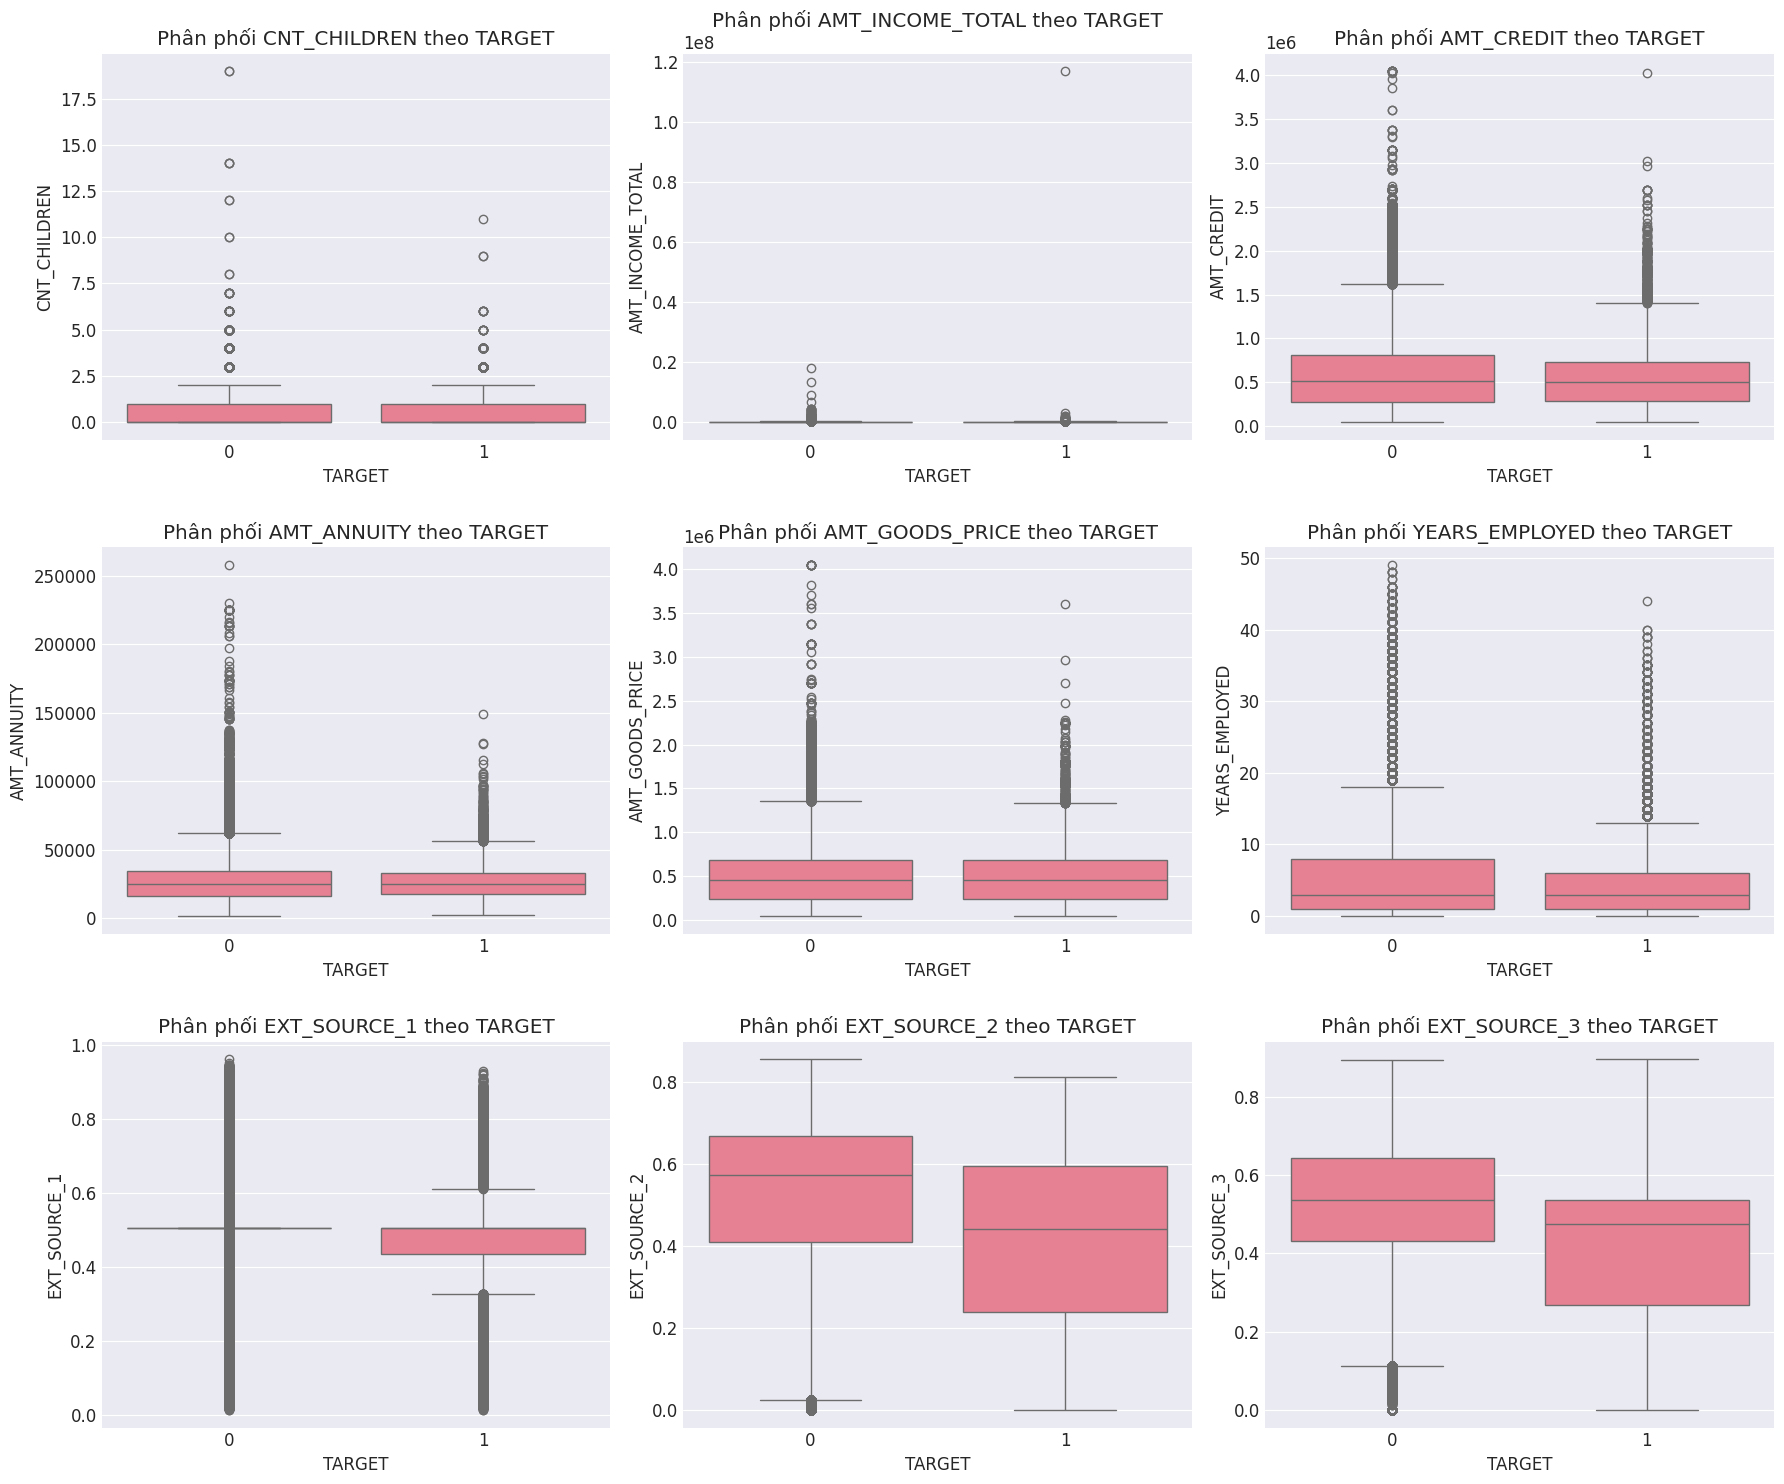

In [ ]:
print("\PHÂN PHỐI CÁC BIẾN SỐ")
print("-"*50)

important_numeric = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
    'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'YEARS_EMPLOYED', 'EXT_SOURCE_1',
    'EXT_SOURCE_2', 'EXT_SOURCE_3']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(important_numeric):
    if col in df.columns:
        sns.boxplot(x='TARGET', y=col, data=df, ax=axes[idx])
        axes[idx].set_title(f'Phân phối {col} theo TARGET')
        axes[idx].set_xlabel('TARGET')
        axes[idx].set_ylabel(col)


plt.tight_layout()
plt.show()



\PHÂN PHỐI CHI TIẾT CÁC BIẾN QUAN TRỌNG
--------------------------------------------------


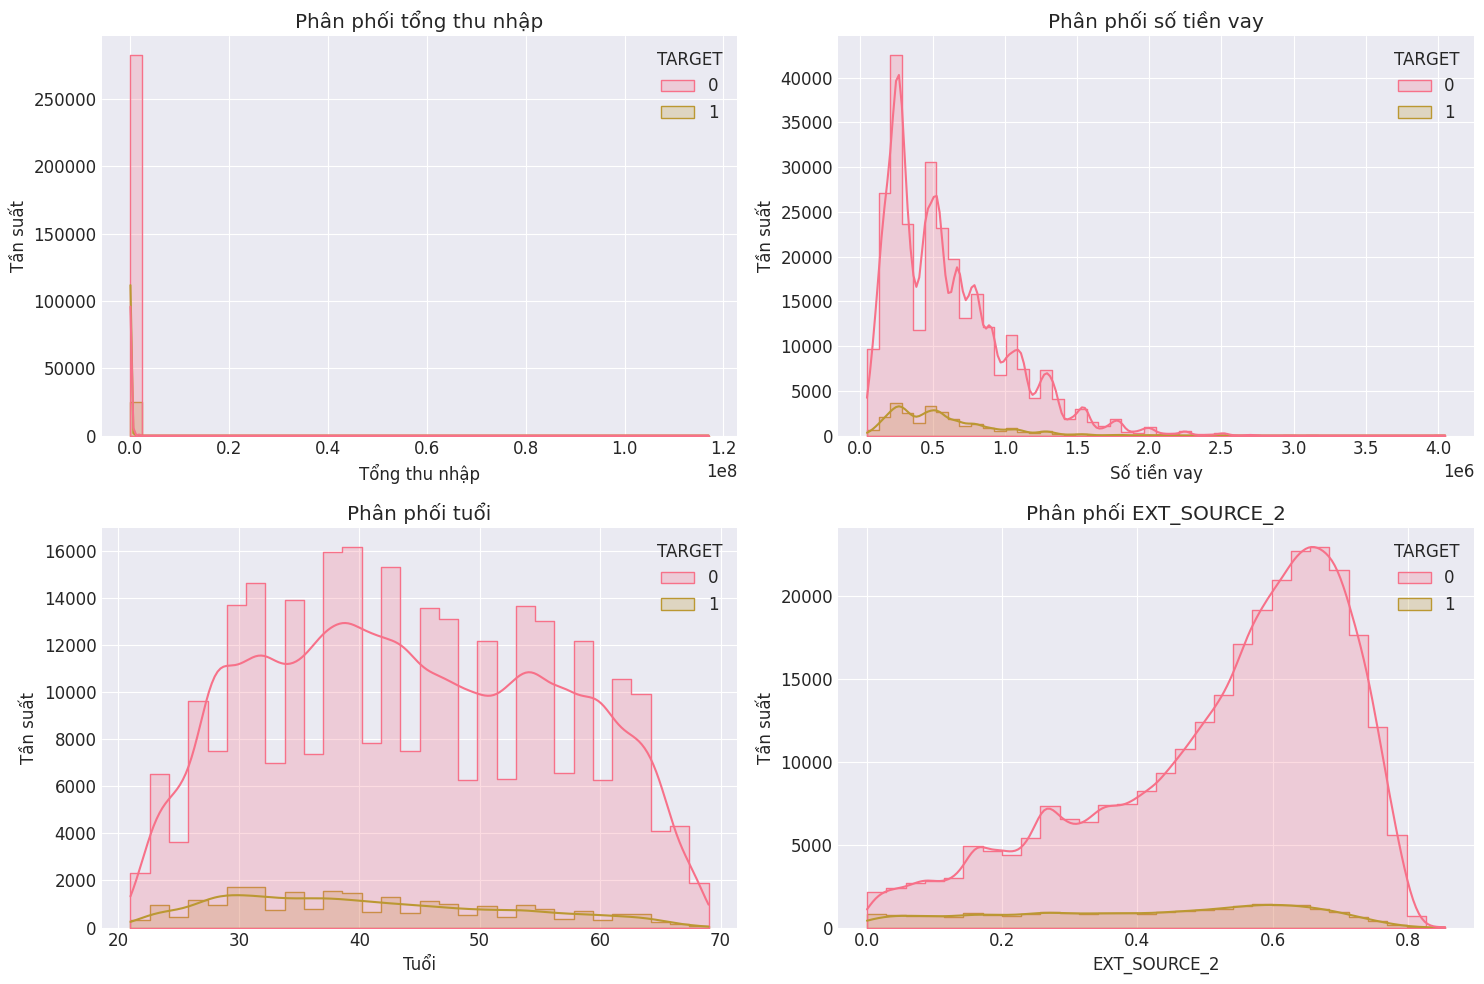

In [ ]:
print("\PHÂN PHỐI CHI TIẾT CÁC BIẾN QUAN TRỌNG")
print("-"*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# AMT_INCOME_TOTAL
sns.histplot(data=df, x='AMT_INCOME_TOTAL', hue='TARGET',
             bins=50, kde=True, ax=axes[0,0], element='step')
axes[0,0].set_title('Phân phối tổng thu nhập')
axes[0,0].set_xlabel('Tổng thu nhập')
axes[0,0].set_ylabel('Tần suất')

# AMT_CREDIT
sns.histplot(data=df, x='AMT_CREDIT', hue='TARGET',
             bins=50, kde=True, ax=axes[0,1], element='step')
axes[0,1].set_title('Phân phối số tiền vay')
axes[0,1].set_xlabel('Số tiền vay')
axes[0,1].set_ylabel('Tần suất')

# YEARS_BIRTH (Tuổi)
sns.histplot(data=df, x='YEARS_BIRTH', hue='TARGET',
             bins=30, kde=True, ax=axes[1,0], element='step')
axes[1,0].set_title('Phân phối tuổi')
axes[1,0].set_xlabel('Tuổi')
axes[1,0].set_ylabel('Tần suất')

# EXT_SOURCE_2 (nếu có)
if 'EXT_SOURCE_2' in df.columns:
    sns.histplot(data=df[df['EXT_SOURCE_2'].notnull()], x='EXT_SOURCE_2', hue='TARGET',
                 bins=30, kde=True, ax=axes[1,1], element='step')
    axes[1,1].set_title('Phân phối EXT_SOURCE_2')
    axes[1,1].set_xlabel('EXT_SOURCE_2')
    axes[1,1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()


PHÂN TÍCH RỦI RO THEO NHÓM TUỔI
--------------------------------------------------
           count  count_percentage  risk_rate
AGE_GROUP                                    
<25        13033              4.64      12.30
25-34      67747             24.11      10.56
35-44      76516             27.23       8.33
45-54      63811             22.71       6.97
55-64      53931             19.20       5.45
65+         5914              2.10       3.52


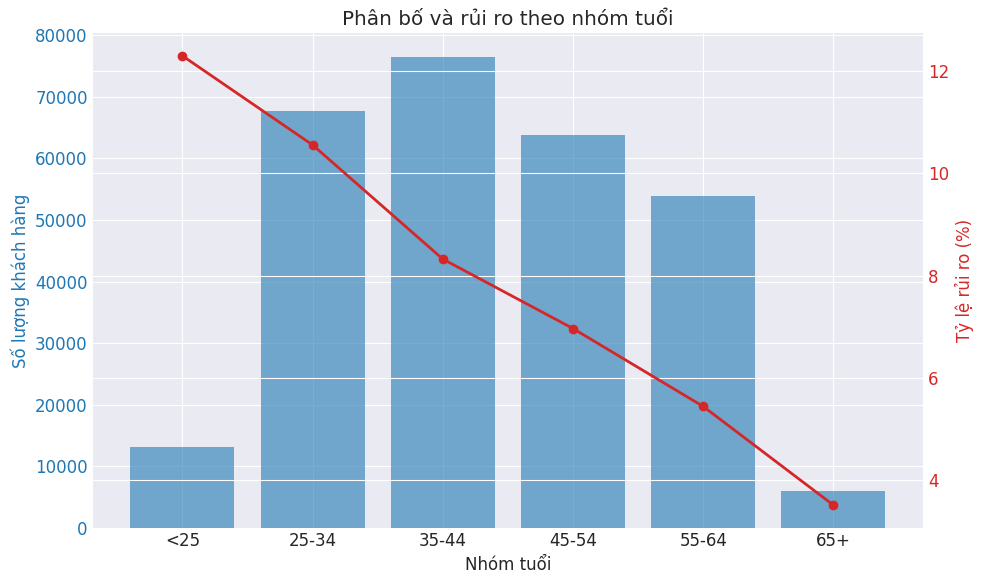

In [ ]:
print("\nPHÂN TÍCH RỦI RO THEO NHÓM TUỔI")
print("-"*50)

# Tạo nhóm tuổi
df['AGE_GROUP'] = pd.cut(df['YEARS_BIRTH'],
                         bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

age_risk = df.groupby('AGE_GROUP')['TARGET'].agg(['count', 'mean'])
age_risk['risk_rate'] = age_risk['mean'] * 100
age_risk['count_percentage'] = (age_risk['count'] / len(df) * 100).round(2)

print(age_risk[['count', 'count_percentage', 'risk_rate']].round(2))

# Visualize
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Nhóm tuổi')
ax1.set_ylabel('Số lượng khách hàng', color=color1)
bars = ax1.bar(age_risk.index, age_risk['count'], color=color1, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Tỷ lệ rủi ro (%)', color=color2)
ax2.plot(age_risk.index, age_risk['risk_rate'], color=color2, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Phân bố và rủi ro theo nhóm tuổi')
plt.tight_layout()
plt.savefig('age_risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

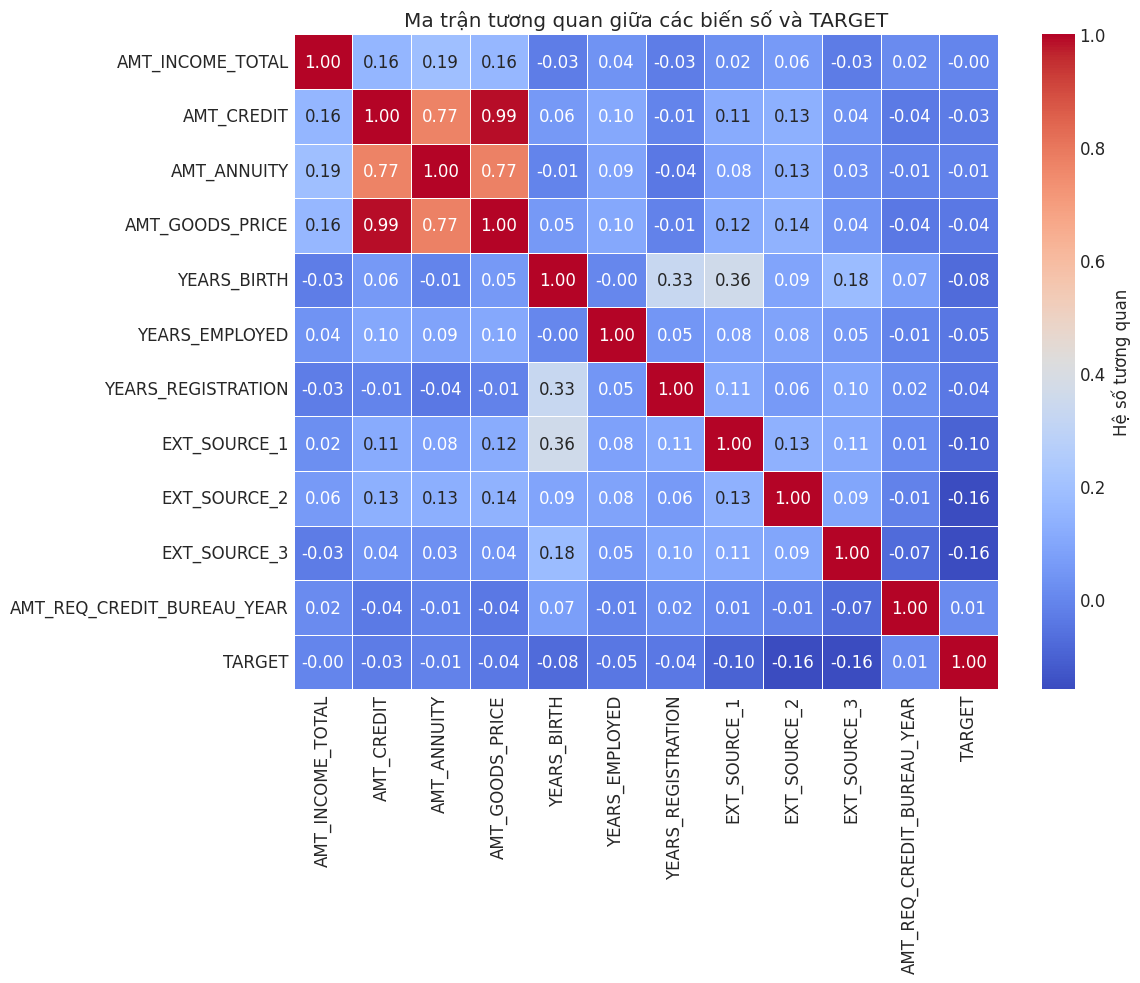

In [ ]:
plt.figure(figsize=(12, 10))

corr = df[numerical_cols + ['TARGET']].corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Hệ số tương quan'}
)

plt.title('Ma trận tương quan giữa các biến số và TARGET')
plt.tight_layout()
plt.show()

In [ ]:
print("\ ĐẶC ĐIỂM KHÁCH HÀNG RỦI RO CAO")
print("-"*50)

high_risk = df[df['TARGET'] == 1]
low_risk = df[df['TARGET'] == 0]

print(f"Số lượng khách hàng rủi ro cao: {len(high_risk)}")
print(f"Số lượng khách hàng rủi ro thấp: {len(low_risk)}")

# So sánh các chỉ số quan trọng
comparison_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                      'YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_CHILDREN']

print("\nSo sánh trung bình giữa nhóm rủi ro và không rủi ro:")
comparison_df = pd.DataFrame({
    'Rủi ro cao (Mean)': high_risk[comparison_metrics].mean(),
    'Rủi ro thấp (Mean)': low_risk[comparison_metrics].mean(),
    'Chênh lệch (%)': ((high_risk[comparison_metrics].mean() /
                       low_risk[comparison_metrics].mean() - 1) * 100).round(2)
})
print(comparison_df)

\ ĐẶC ĐIỂM KHÁCH HÀNG RỦI RO CAO
--------------------------------------------------
Số lượng khách hàng rủi ro cao: 23732
Số lượng khách hàng rủi ro thấp: 269982

So sánh trung bình giữa nhóm rủi ro và không rủi ro:
                  Rủi ro cao (Mean)  Rủi ro thấp (Mean)  Chênh lệch (%)
AMT_INCOME_TOTAL      165986.574119       169070.516092           -1.82
AMT_CREDIT            558195.153084       602752.861757           -7.39
AMT_ANNUITY            26497.333958        27169.530135           -2.47
YEARS_BIRTH               40.789567           44.210999           -7.74
YEARS_EMPLOYED             4.372029            5.450286          -19.78
CNT_CHILDREN               0.464310            0.412839           12.47


# Tiến hành phân tích mô tả

In [ ]:
# PHẦN 2: PHÂN TÍCH VÀ GỘP NHÓM HIẾM
print("PHẦN 2: PHÂN TÍCH VÀ GỘP NHÓM HIẾM")
print(" PHÂN TÍCH CÁC NHÓM GIÁ TRỊ TRONG BIẾN PHÂN LOẠI:")
for col in cat_cols:
    print(f"\n {col}:")
    value_counts = data[col].value_counts(normalize=True)

    # In top 5 nhóm phổ biến
    print("Top 5 nhóm phổ biến:")
    for val, perc in value_counts.head().items():
        print(f"  {val}: {perc*100:.1f}%")

    # Phân tích nhóm hiếm
    rare_categories = value_counts[value_counts < 0.02].index
    if len(rare_categories) > 0:
        print(f" Có {len(rare_categories)} nhóm hiếm (<2%): {list(rare_categories)}")

        # Gộp nhóm hiếm
        data[col] = data[col].replace(rare_categories, 'Other')

        # Kiểm tra sau khi gộp
        new_counts = data[col].value_counts(normalize=True)
        print(f" Sau khi gộp: {len(new_counts)} nhóm")
        if 'Other' in new_counts.index:
            print(f"  - Nhóm 'Other': {new_counts['Other']*100:.1f}%")
    else:
        print(" Không có nhóm hiếm (<2%)")

print("\n ĐÃ HOÀN THÀNH GỘP NHÓM HIẾM")

PHẦN 2: PHÂN TÍCH VÀ GỘP NHÓM HIẾM
 PHÂN TÍCH CÁC NHÓM GIÁ TRỊ TRONG BIẾN PHÂN LOẠI:

 NAME_CONTRACT_TYPE:
Top 5 nhóm phổ biến:
  Cash loans: 90.5%
  Revolving loans: 9.5%
 Không có nhóm hiếm (<2%)

 CODE_GENDER:
Top 5 nhóm phổ biến:
  F: 65.8%
  M: 34.2%
  XNA: 0.0%
 Có 1 nhóm hiếm (<2%): ['XNA']
 Sau khi gộp: 3 nhóm
  - Nhóm 'Other': 0.0%

 FLAG_OWN_CAR:
Top 5 nhóm phổ biến:
  N: 66.0%
  Y: 34.0%
 Không có nhóm hiếm (<2%)

 FLAG_OWN_REALTY:
Top 5 nhóm phổ biến:
  Y: 69.4%
  N: 30.6%
 Không có nhóm hiếm (<2%)

 NAME_INCOME_TYPE:
Top 5 nhóm phổ biến:
  Working: 51.6%
  Commercial associate: 23.3%
  Pensioner: 18.0%
  State servant: 7.1%
  Unemployed: 0.0%
 Có 4 nhóm hiếm (<2%): ['Unemployed', 'Student', 'Businessman', 'Maternity leave']
 Sau khi gộp: 5 nhóm
  - Nhóm 'Other': 0.0%

 NAME_EDUCATION_TYPE:
Top 5 nhóm phổ biến:
  Secondary / secondary special: 71.0%
  Higher education: 24.3%
  Incomplete higher: 3.3%
  Lower secondary: 1.2%
  Academic degree: 0.1%
 Có 2 nhóm hiếm (<2%): ['L

In [ ]:
# Xóa biến AMT_CREDIT khỏi tập dữ liệu
data.drop(columns=['AMT_CREDIT'],inplace=True)

# Kiểm tra lại danh sách cột
print(data.columns)

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [ ]:
data.select_dtypes(include=['number']).describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,27108.487841,5.383163e+05,43.938646,5.356342,13.659440,0.504311,5.145034e-01,0.515695,1.778463
std,0.272419,0.722121,2.371231e+05,14493.461065,3.692890e+05,11.964047,6.325105,9.659369,0.139408,1.908699e-01,0.174736,1.765523
min,0.000000,0.000000,2.565000e+04,1615.500000,4.050000e+04,21.000000,0.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000
25%,0.000000,0.000000,1.125000e+05,16524.000000,2.385000e+05,34.000000,1.000000,6.000000,0.505998,3.929737e-01,0.417100,1.000000
50%,0.000000,0.000000,1.471500e+05,24903.000000,4.500000e+05,43.000000,3.000000,12.000000,0.505998,5.659614e-01,0.535276,1.000000
75%,0.000000,1.000000,2.025000e+05,34596.000000,6.795000e+05,54.000000,8.000000,20.000000,0.505998,6.634218e-01,0.636376,3.000000
max,1.000000,19.000000,1.170000e+08,258025.500000,4.050000e+06,69.000000,49.000000,68.000000,0.962693,8.549997e-01,0.896010,25.000000


# Xử lý độ lệch , ngoại lai bằng log và outlier

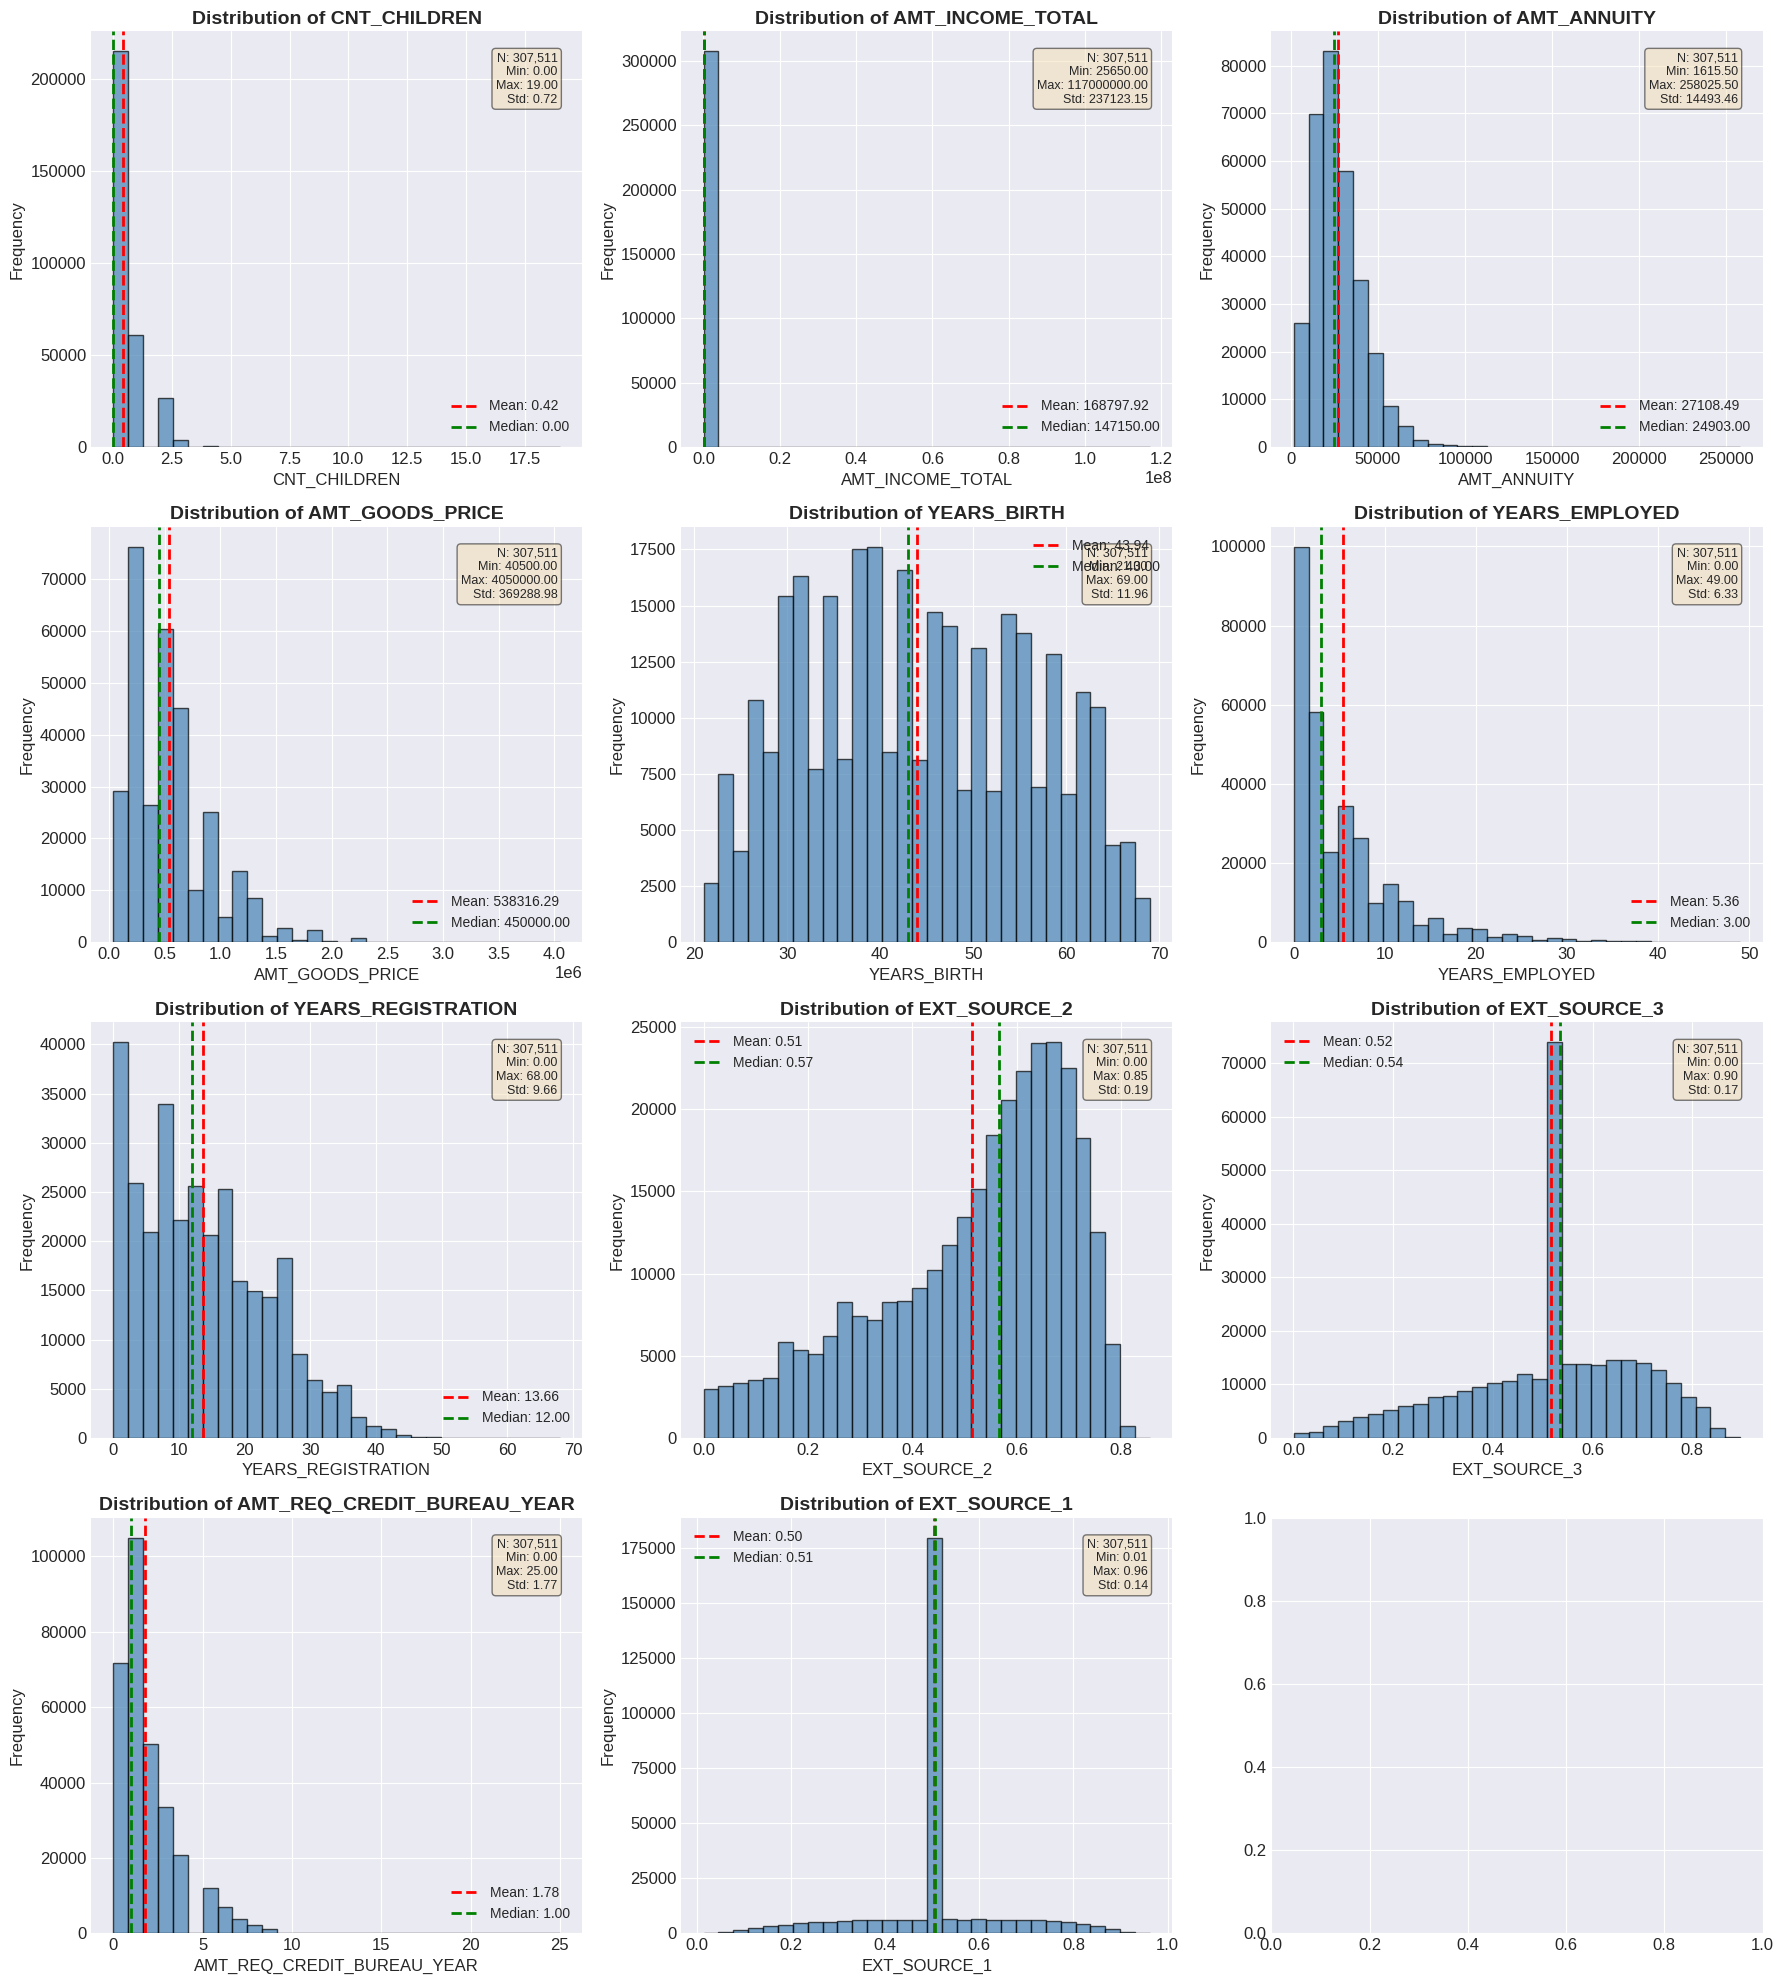

In [ ]:
# Danh sách các biến số
numeric_cols = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_1'
]

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')

# Tạo figure với nhiều subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

# Vẽ histogram cho từng biến
for idx, col in enumerate(numeric_cols):
    if idx >= len(axes):
        break

    ax = axes[idx]

    # Kiểm tra xem cột có tồn tại trong dataframe không
    if col in data:  # Sửa lại thành một dấu hai chấm
        # Tính toán các giá trị thống kê
        col_data = data[col].dropna()  # Use a temporary variable for column data
        mean_val = col_data.mean()
        median_val = col_data.median()

        # Vẽ histogram
        ax.hist(col_data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')

        # Thêm đường trung bình và median
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

        # Thiết lập tiêu đề và labels
        ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.legend(fontsize=10)

        # Thêm thông tin thống kê
        stats_text = f'N: {len(col_data):,}\nMin: {col_data.min():.2f}\nMax: {col_data.max():.2f}\nStd: {col_data.std():.2f}'
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                fontsize=9, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        ax.text(0.5, 0.5, f'Column "{col}"\nnot found',
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=14, color='red')
        ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')

# Điều chỉnh layout
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()

In [ ]:
# PHẦN 4: LOG-TRANSFORM BIẾN SỐ
print(" LOG-TRANSFORM BIẾN SỐ")
print(" KIỂM TRA ĐỘ LỆCH (SKEWNESS) CỦA CÁC BIẾN:")

# Cập nhật num_cols để phản ánh các cột hiện có trong DataFrame
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

skewed_cols = []
for col in num_cols:
    if col != 'TARGET':
        # Kiểm tra và xử lý infinite values trước
        data[col] = data[col].replace([np.inf, -np.inf], np.nan)
        data[col] = data[col].fillna(data[col].median())
        skewness = skew(data[col])
        print(f"{col}: skewness = {skewness:.2f}", end="")

        if abs(skewness) > 1.5:
            print(" (CẦN TRANSFORM)")
            skewed_cols.append((col, skewness))
        else:
            print(" đã oke")

print("\n THỰC HIỆN LOG-TRANSFORM:")
print("-"*40)

for col, skewness in skewed_cols:
    # Kiểm tra giá trị <= 0
    min_val = data[col].min()

    if min_val <= 0:
        # Tìm offset để tất cả giá trị > 0
        offset = abs(min_val) + 0.001 if min_val <= 0 else 0
        data[col] = np.log1p(data[col] + offset)
        print(f" {col}: Log(x + {offset:.2f}) (skewness: {skewness:.2f})")
    else:
        data[col] = np.log(data[col])
        print(f" {col}: Log(x) (skewness: {skewness:.2f})")

print("\n ĐÃ HOÀN THÀNH LOG-TRANSFORM")

 LOG-TRANSFORM BIẾN SỐ
 KIỂM TRA ĐỘ LỆCH (SKEWNESS) CỦA CÁC BIẾN:
CNT_CHILDREN: skewness = 1.97 (CẦN TRANSFORM)
AMT_INCOME_TOTAL: skewness = 391.56 (CẦN TRANSFORM)
AMT_ANNUITY: skewness = 1.58 (CẦN TRANSFORM)
AMT_GOODS_PRICE: skewness = 1.35 đã oke
YEARS_BIRTH: skewness = 0.12 đã oke
YEARS_EMPLOYED: skewness = 2.04 (CẦN TRANSFORM)
YEARS_REGISTRATION: skewness = 0.59 đã oke
EXT_SOURCE_1: skewness = -0.15 đã oke
EXT_SOURCE_2: skewness = -0.80 đã oke
EXT_SOURCE_3: skewness = -0.54 đã oke
AMT_REQ_CREDIT_BUREAU_YEAR: skewness = 1.47 đã oke

 THỰC HIỆN LOG-TRANSFORM:
----------------------------------------
 CNT_CHILDREN: Log(x + 0.00) (skewness: 1.97)
 AMT_INCOME_TOTAL: Log(x) (skewness: 391.56)
 AMT_ANNUITY: Log(x) (skewness: 1.58)
 YEARS_EMPLOYED: Log(x + 0.00) (skewness: 2.04)

 ĐÃ HOÀN THÀNH LOG-TRANSFORM


In [ ]:
# PHẦN 3: PHÂN TÍCH VÀ XỬ LÝ OUTLIER
print("PHẦN 3: PHÂN TÍCH VÀ XỬ LÝ OUTLIER")

print("PHÂN TÍCH % OUTLIER CỦA CÁC BIẾN SỐ:")
print("-"*40)

outlier_info = []
for col in num_cols:
    if col != 'TARGET':
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_percent = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
        outlier_info.append((col, outlier_percent))

        if outlier_percent > 1:
            print(f" {col}: {outlier_percent:.2f}% outlier (CẦN XỬ LÝ)")
        else:
            print(f" {col}: {outlier_percent:.2f}% outlier")


PHẦN 3: PHÂN TÍCH VÀ XỬ LÝ OUTLIER
PHÂN TÍCH % OUTLIER CỦA CÁC BIẾN SỐ:
----------------------------------------
 CNT_CHILDREN: 0.04% outlier
 AMT_INCOME_TOTAL: 2.14% outlier (CẦN XỬ LÝ)
 AMT_ANNUITY: 0.73% outlier
 AMT_GOODS_PRICE: 4.79% outlier (CẦN XỬ LÝ)
 YEARS_BIRTH: 0.00% outlier
 YEARS_EMPLOYED: 0.00% outlier
 YEARS_REGISTRATION: 0.35% outlier
 EXT_SOURCE_1: 43.62% outlier (CẦN XỬ LÝ)
 EXT_SOURCE_2: 0.00% outlier
 EXT_SOURCE_3: 1.40% outlier (CẦN XỬ LÝ)
 AMT_REQ_CREDIT_BUREAU_YEAR: 2.35% outlier (CẦN XỬ LÝ)


In [ ]:
# Xử lý outlier cho EXT_SOURCE_1 bằng capping
Q1, Q3 = data['EXT_SOURCE_1'].quantile([0.25, 0.75])
IQR = Q3 - Q1
data['EXT_SOURCE_1'] = data['EXT_SOURCE_1'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
print("Đã xử lý outlier cho EXT_SOURCE_1")

Đã xử lý outlier cho EXT_SOURCE_1


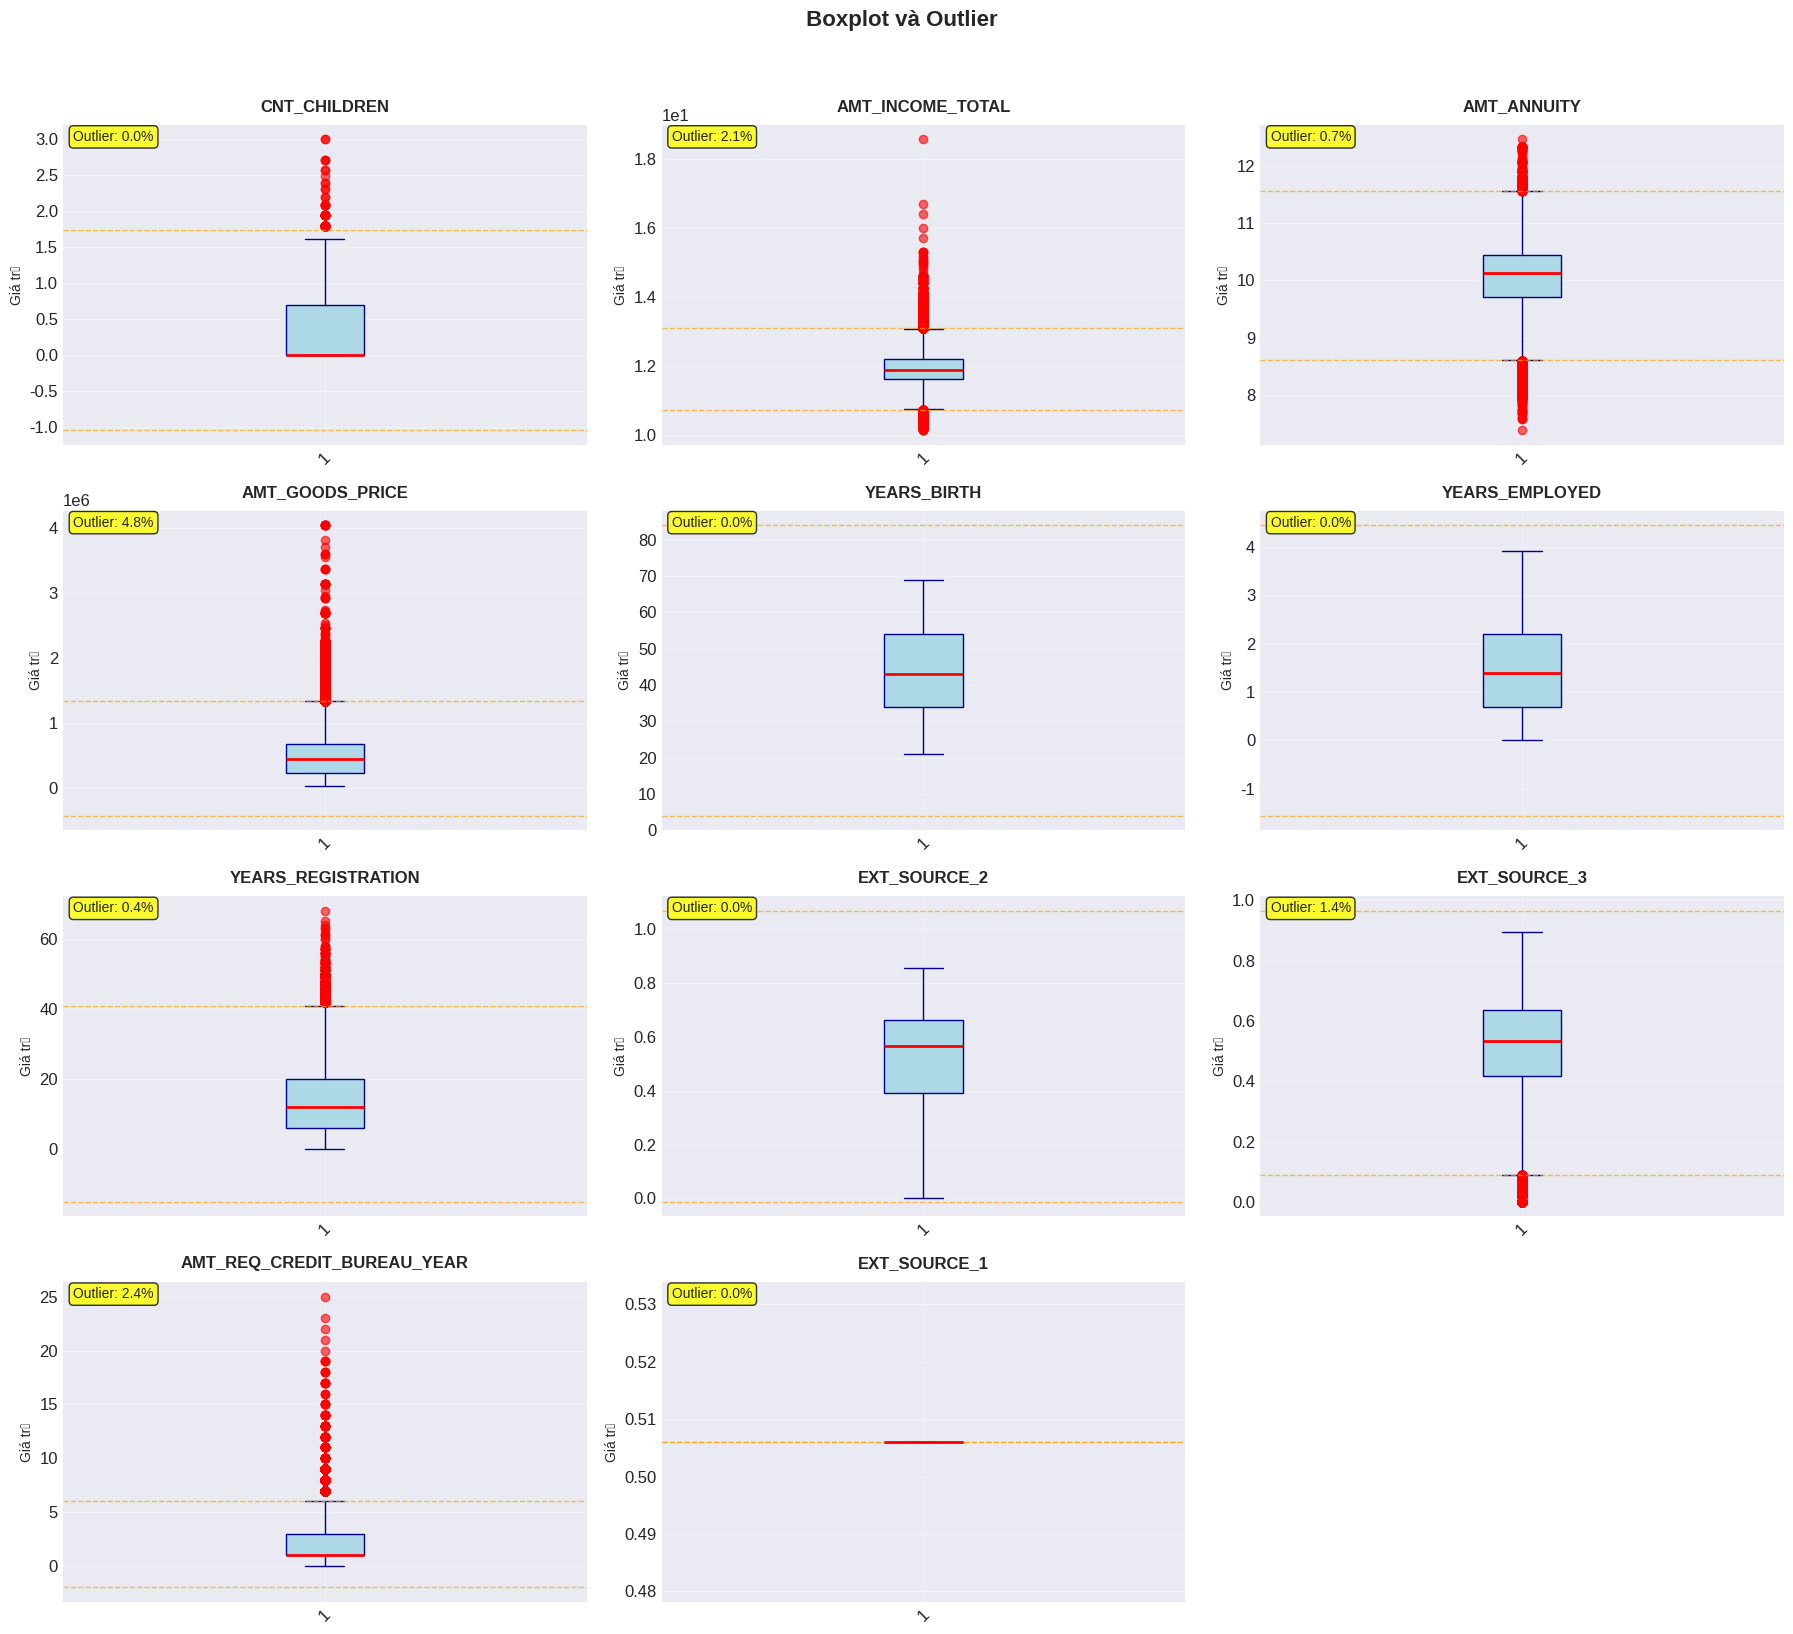

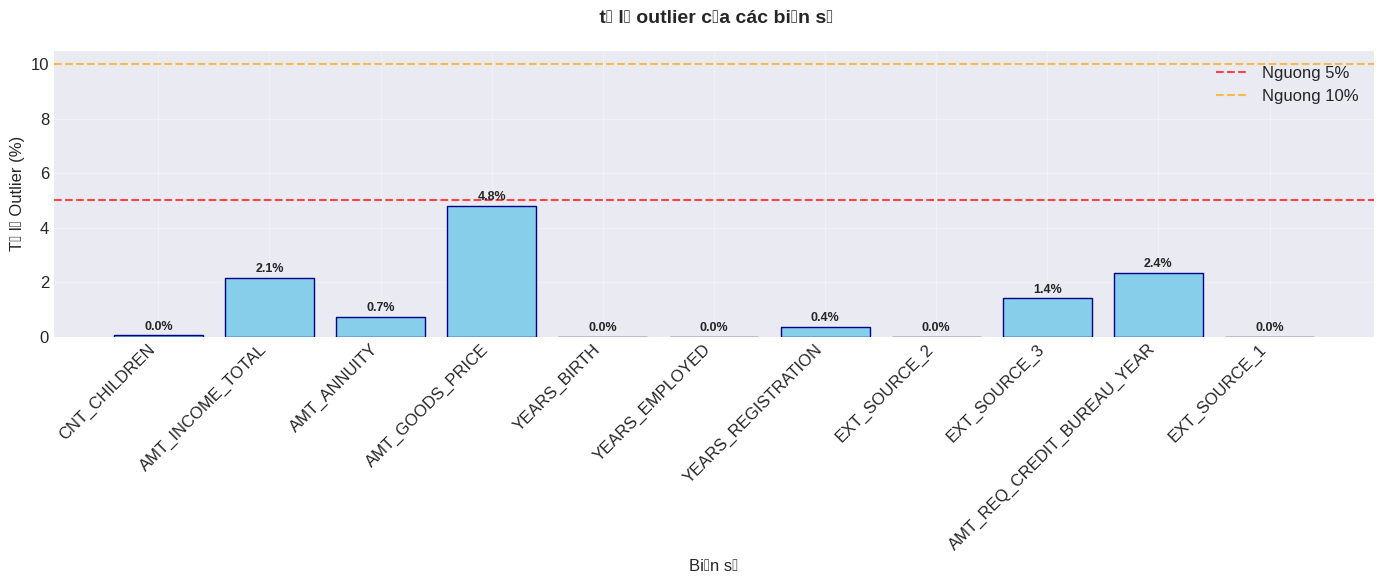

BẢNG TỔNG HỢP TỶ LỆ OUTLIER
Biến số                        Tỷ lệ Outlier   Số Outlier   Tổng số   
--------------------------------------------------------------------------------
CNT_CHILDREN                   0.04           % 126          307,511   
AMT_INCOME_TOTAL               2.14           % 6,591        307,511   
AMT_ANNUITY                    0.73           % 2,244        307,511   
AMT_GOODS_PRICE                4.79           % 14,728       307,511   
YEARS_BIRTH                    0.00           % 0            307,511   
YEARS_EMPLOYED                 0.00           % 0            307,511   
YEARS_REGISTRATION             0.35           % 1,081        307,511   
EXT_SOURCE_2                   0.00           % 0            307,511   
EXT_SOURCE_3                   1.40           % 4,313        307,511   
AMT_REQ_CREDIT_BUREAU_YEAR     2.35           % 7,233        307,511   
EXT_SOURCE_1                   0.00           % 0            307,511   


In [ ]:
import seaborn as sns
# Cấu hình style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Khởi tạo dictionary để lưu kết quả outlier
outlier_results_iqr = {}

# Tính toán thông tin outlier cho từng biến số
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đếm số lượng outlier
    outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    total_count = len(data[col])
    outlier_percentage = (outlier_count / total_count) * 100

    outlier_results_iqr[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': outlier_count,
        'total_count': total_count,
        'outlier_percentage': outlier_percentage
    }

# 1. VẼ BOXPLOT CHO TẤT CẢ BIẾN
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        ax = axes[idx]

        # Lấy thông tin outlier từ kết quả đã tính
        stats = outlier_results_iqr[col]

        # Vẽ boxplot
        boxplot = ax.boxplot(data[col].dropna(), patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='darkblue'),
                            medianprops=dict(color='red', linewidth=2),
                            whiskerprops=dict(color='darkblue'),
                            capprops=dict(color='darkblue'),
                            flierprops=dict(marker='o', markerfacecolor='red',
                                           markersize=6, markeredgecolor='red', alpha=0.6))

        # Thêm thông tin outlier
        ax.text(0.02, 0.95, f"Outlier: {stats['outlier_percentage']:.1f}%",
                transform=ax.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

        # Thêm đường ngưỡng
        ax.axhline(y=stats['lower_bound'], color='orange', linestyle='--', alpha=0.7, linewidth=1)
        ax.axhline(y=stats['upper_bound'], color='orange', linestyle='--', alpha=0.7, linewidth=1)

        ax.set_title(f'{col}', fontsize=12, fontweight='bold', pad=10)
        ax.set_ylabel('Giá trị', fontsize=10)
        ax.grid(True, alpha=0.3)

        # Định dạng trục Y cho các biến có giá trị lớn
        if col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']:
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

        ax.tick_params(axis='x', rotation=45)

# Ẩn các subplot thừa
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(' Boxplot và Outlier ',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. BIỂU ĐỒ TỶ LỆ OUTLIER
plt.figure(figsize=(14, 6))

# Lấy tỷ lệ outlier
outlier_percentages = [outlier_results_iqr[col]['outlier_percentage'] for col in numeric_cols]

# Vẽ bar chart
bars = plt.bar(range(len(numeric_cols)), outlier_percentages, color='skyblue', edgecolor='darkblue')

# Highlight các cột có tỷ lệ outlier cao
for i, (bar, pct) in enumerate(zip(bars, outlier_percentages)):
    if pct > 5:
        bar.set_color('salmon')
        bar.set_edgecolor('darkred')

    # Thêm giá trị phần trăm
    plt.text(i, bar.get_height() + 0.1, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Thêm đường ngưỡng
plt.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='Nguong 5%')
plt.axhline(y=10, color='orange', linestyle='--', alpha=0.7, label='Nguong 10%')

# Cấu hình biểu đồ
plt.title(' tỉ lệ outlier của các biến số', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Biến số', fontsize=12)
plt.ylabel('Tỷ lệ Outlier (%)', fontsize=12)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. IN BẢNG TỔNG HỢP TỶ LỆ OUTLIER
print("="*80)
print("BẢNG TỔNG HỢP TỶ LỆ OUTLIER")
print("="*80)
print(f"{'Biến số':<30} {'Tỷ lệ Outlier':<15} {'Số Outlier':<12} {'Tổng số':<10}")
print("-"*80)

for col in numeric_cols:
    stats = outlier_results_iqr[col]
    print(f"{col:<30} {stats['outlier_percentage']:<15.2f}% {stats['outlier_count']:<12,} {stats['total_count']:<10,}")

print("="*80)

# CHIA DỮ LIỆU TRAIN-TEST

In [ ]:
# PHẦN 5: CHIA DỮ LIỆU TRAIN-TEST
print("PHẦN 5: CHIA DỮ LIỆU TRAIN-TEST")
# Tách features và target
X = data.drop('TARGET', axis=1)
y = data['TARGET']

print(f" TỔNG QUAN DỮ LIỆU:")
print(f"Số mẫu: {len(data)}")
print(f" Số features: {X.shape[1]}")
print(f" Phân phối TARGET:")
print(f"  TARGET=0 (Trả nợ): {(y == 0).sum()} mẫu ({(y == 0).mean()*100:.1f}%)")
print(f"  TARGET=1 (Vỡ nợ): {(y == 1).sum()} mẫu ({(y == 1).mean()*100:.1f}%)")

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nCHIA DỮ LIỆU 80-20:")
print(f"Training set: {X_train.shape[0]} mẫu ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"  TARGET=0: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"   TARGET=1: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")
print(f"\nTest set: {X_test.shape[0]} mẫu ({X_test.shape[0]/len(data)*100:.1f}%)")
print(f"   TARGET=0: {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"   TARGET=1: {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")

print("\n ĐÃ CHIA DỮ LIỆU XONG")

PHẦN 5: CHIA DỮ LIỆU TRAIN-TEST
 TỔNG QUAN DỮ LIỆU:
Số mẫu: 307511
 Số features: 21
 Phân phối TARGET:
  TARGET=0 (Trả nợ): 282686 mẫu (91.9%)
  TARGET=1 (Vỡ nợ): 24825 mẫu (8.1%)

CHIA DỮ LIỆU 80-20:
Training set: 246008 mẫu (80.0%)
  TARGET=0: 226148 (91.9%)
   TARGET=1: 19860 (8.1%)

Test set: 61503 mẫu (20.0%)
   TARGET=0: 56538 (91.9%)
   TARGET=1: 4965 (8.1%)

 ĐÃ CHIA DỮ LIỆU XONG


# Standard các biến số và OHE các biến phân loại

In [ ]:
# PHẦN 6: SCALING BIẾN SỐ
print("PHẦN 7: SCALING BIẾN SỐ")
encoders = {}

# Xác định biến số (sau khi mã hóa)
num_cols_train = X_train.select_dtypes(include=[np.number]).columns.tolist()

print(f" Tìm thấy {len(num_cols_train)} biến số cần scaling")
print("Danh sách biến số:")
for i, col in enumerate(num_cols_train[:10]):
    print(f"  {i+1}. {col}")
if len(num_cols_train) > 10:
    print(f"  ... và {len(num_cols_train) - 10} biến khác")

print("\n THỐNG KÊ TRƯỚC KHI SCALING (trên tập train):")

for col in num_cols_train[:3]:  # Hiển thị 3 biến đầu
    print(f"{col}: min={X_train[col].min():.2f}, max={X_train[col].max():.2f}, mean={X_train[col].mean():.2f}")

scaler = StandardScaler()

# Fit chỉ trên train
X_train_scaled = scaler.fit_transform(X_train[num_cols_train])
X_test_scaled = scaler.transform(X_test[num_cols_train])

# Cập nhật lại DataFrame
X_train[num_cols_train] = X_train_scaled
X_test[num_cols_train] = X_test_scaled

encoders['scaler'] = scaler

print("\n THỐNG KÊ SAU KHI SCALING (trên tập train):")
for col in num_cols_train[:3]:
    print(f"{col}: min={X_train[col].min():.2f}, max={X_train[col].max():.2f}, mean={X_train[col].mean():.2f}")

print("\n ĐÃ HOÀN THÀNH SCALING")

PHẦN 7: SCALING BIẾN SỐ
 Tìm thấy 11 biến số cần scaling
Danh sách biến số:
  1. CNT_CHILDREN
  2. AMT_INCOME_TOTAL
  3. AMT_ANNUITY
  4. AMT_GOODS_PRICE
  5. YEARS_BIRTH
  6. YEARS_EMPLOYED
  7. YEARS_REGISTRATION
  8. EXT_SOURCE_1
  9. EXT_SOURCE_2
  10. EXT_SOURCE_3
  ... và 1 biến khác

 THỐNG KÊ TRƯỚC KHI SCALING (trên tập train):
CNT_CHILDREN: min=0.00, max=3.00, mean=0.25
AMT_INCOME_TOTAL: min=10.15, max=18.58, mean=11.91
AMT_ANNUITY: min=7.39, max=12.46, mean=10.07

 THỐNG KÊ SAU KHI SCALING (trên tập train):
CNT_CHILDREN: min=-0.62, max=6.77, mean=-0.00
AMT_INCOME_TOTAL: min=-3.60, max=13.65, mean=0.00
AMT_ANNUITY: min=-4.91, max=4.38, mean=0.00

 ĐÃ HOÀN THÀNH SCALING


In [ ]:

# PHẦN 7: MÃ HÓA BIẾN PHÂN LOẠI
print("PHẦN 7: MÃ HÓA BIẾN PHÂN LOẠI")

# Phân loại biến trên tập train
train_cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f" Tìm thấy {len(train_cat_cols)} biến phân loại:")
for col in train_cat_cols:
    n_unique = X_train[col].nunique()
    print(f"  • {col}: {n_unique} nhóm")

print("\nPHÂN LOẠI BIẾN:")
binary_vars = []
low_card_vars = []
high_card_vars = []

for col in train_cat_cols:
    n_unique = X_train[col].nunique()
    if n_unique == 2:
        binary_vars.append(col)
        print(f"   {col}: {n_unique} nhóm → LABEL ENCODING")
    elif 3 <= n_unique <= 10:
        low_card_vars.append(col)
        print(f"   {col}: {n_unique} nhóm → ONE-HOT ENCODING")
    else:
        high_card_vars.append(col)
        print(f"  {col}: {n_unique} nhóm → TARGET ENCODING")

# Lưu các encoder
encoders = {}

# 1. Label Encoding cho biến nhị phân
print("\n1. LABEL ENCODING cho biến nhị phân:")
if binary_vars:
    for col in binary_vars:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        encoders[f'label_{col}'] = le
        print(f"✓ {col}: {list(le.classes_)} → {list(range(len(le.classes_)))}")
else:
    print("Không có biến nhị phân nào")

# 2. One-Hot Encoding cho biến ít nhóm
print("\n2. ONE-HOT ENCODING cho biến ít nhóm:")
if low_card_vars:
    ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

    # Fit trên train
    X_train_ohe = ohe.fit_transform(X_train[low_card_vars])
    X_test_ohe = ohe.transform(X_test[low_card_vars])

    # Tạo tên cột
    ohe_columns = []
    for i, col in enumerate(low_card_vars):
        categories = ohe.categories_[i][1:]  # Bỏ category đầu tiên
        ohe_columns.extend([f"{col}_{str(cat).replace(' ', '_')}" for cat in categories])

    # Tạo DataFrame
    X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
    X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

    # Gộp lại và xóa cột gốc
    X_train = pd.concat([X_train.drop(low_card_vars, axis=1), X_train_ohe_df], axis=1)
    X_test = pd.concat([X_test.drop(low_card_vars, axis=1), X_test_ohe_df], axis=1)

    encoders['onehot'] = ohe
    print(f"✓ Đã tạo {len(ohe_columns)} cột mới từ {len(low_card_vars)} biến")
    print(f"  Cột mới: {ohe_columns[:5]}..." if len(ohe_columns) > 5 else f"  Cột mới: {ohe_columns}")
else:
    print("Không có biến ít nhóm nào")

# 3. Target Encoding cho biến nhiều nhóm
print("\n3. TARGET ENCODING cho biến nhiều nhóm:")
if high_card_vars:
    try:
        from category_encoders import TargetEncoder

        te = TargetEncoder(cols=high_card_vars, smoothing=10.0)

        # Fit trên train với y_train
        X_train[high_card_vars] = te.fit_transform(X_train[high_card_vars], y_train)
        X_test[high_card_vars] = te.transform(X_test[high_card_vars])

        encoders['target'] = te
        print(f"✓ Đã target encoding cho {len(high_card_vars)} biến")

        # Hiển thị ví dụ
        for col in high_card_vars[:2]:  # Chỉ hiển thị 2 biến đầu
            print(f"  • {col}: {X_train[col].nunique()} giá trị duy nhất sau encoding")
    except ImportError:
        print("  Sử dụng Frequency Encoding thay thế.")

        for col in high_card_vars:
            # Frequency Encoding: mã hóa bằng tần suất xuất hiện
            freq = X_train[col].value_counts(normalize=True)
            X_train[col] = X_train[col].map(freq)
            X_test[col] = X_test[col].map(freq).fillna(freq.mean())  # Nếu có nhóm mới
            print(f"✓ {col}: Frequency Encoding")
else:
    print("Không có biến nhiều nhóm nào")

print(f"\n HOÀN THÀNH MÃ HÓA")
print(f"Training shape: {X_train.shape}")
print(f" Test shape: {X_test.shape}")

PHẦN 7: MÃ HÓA BIẾN PHÂN LOẠI
 Tìm thấy 10 biến phân loại:
  • NAME_CONTRACT_TYPE: 2 nhóm
  • CODE_GENDER: 3 nhóm
  • FLAG_OWN_CAR: 2 nhóm
  • FLAG_OWN_REALTY: 2 nhóm
  • NAME_INCOME_TYPE: 5 nhóm
  • NAME_EDUCATION_TYPE: 4 nhóm
  • NAME_FAMILY_STATUS: 6 nhóm
  • NAME_HOUSING_TYPE: 4 nhóm
  • OCCUPATION_TYPE: 11 nhóm
  • REGION_RATING_CLIENT_W_CITY: 3 nhóm

PHÂN LOẠI BIẾN:
   NAME_CONTRACT_TYPE: 2 nhóm → LABEL ENCODING
   CODE_GENDER: 3 nhóm → ONE-HOT ENCODING
   FLAG_OWN_CAR: 2 nhóm → LABEL ENCODING
   FLAG_OWN_REALTY: 2 nhóm → LABEL ENCODING
   NAME_INCOME_TYPE: 5 nhóm → ONE-HOT ENCODING
   NAME_EDUCATION_TYPE: 4 nhóm → ONE-HOT ENCODING
   NAME_FAMILY_STATUS: 6 nhóm → ONE-HOT ENCODING
   NAME_HOUSING_TYPE: 4 nhóm → ONE-HOT ENCODING
  OCCUPATION_TYPE: 11 nhóm → TARGET ENCODING
   REGION_RATING_CLIENT_W_CITY: 3 nhóm → ONE-HOT ENCODING

1. LABEL ENCODING cho biến nhị phân:
✓ NAME_CONTRACT_TYPE: ['Cash loans', 'Revolving loans'] → [0, 1]
✓ FLAG_OWN_CAR: ['N', 'Y'] → [0, 1]
✓ FLAG_OWN_REAL

# XỬ LÝ MẤT CÂN BẰNG CHO TẬP TRAIN

In [ ]:
# PHẦN 8: XỬ LÝ MẤT CÂN BẰNG LỚP VỚI SMOTE

print("PHẦN 8: XỬ LÝ MẤT CÂN BẰNG LỚP")


print(" PHÂN PHỐI LỚP HIỆN TẠI:")
print("TRÊN TẬP TRAIN:")
class_dist = Counter(y_train)
total = sum(class_dist.values())
for cls, count in class_dist.items():
    print(f"  TARGET={cls}: {count} mẫu ({count/total*100:.1f}%)")

print("\nTRÊN TẬP TEST:")
class_dist_test = Counter(y_test)
total_test = sum(class_dist_test.values())
for cls, count in class_dist_test.items():
    print(f"  TARGET={cls}: {count} mẫu ({count/total_test*100:.1f}%)")

imbalance_ratio = class_dist[1] / class_dist[0]
print(f"\n TỶ LỆ MẤT CÂN BẰNG (lớp 1/lớp 0): {imbalance_ratio:.3f}")

#if imbalance_ratio < 0.2:  # Nếu lớp thiểu số < 20%
    print("\n PHÁT HIỆN MẤT CÂN BẰNG LỚP NẶNG")
    print(" ÁP DỤNG SMOTE (chỉ trên tập train)")

    try:
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        print("\n ĐÃ ÁP DỤNG SMOTE")
        print(" PHÂN PHỐI LỚP SAU SMOTE:")
        print("-"*40)
        class_dist_res = Counter(y_train_res)
        total_res = sum(class_dist_res.values())
        for cls, count in class_dist_res.items():
            print(f"  • TARGET={cls}: {count} mẫu ({count/total_res*100:.1f}%)")

        # Cập nhật lại training data
        X_train = X_train_res
        y_train = y_train_res

        print(f"\n SỐ MẪU TĂNG TỪ {total} LÊN {total_res}")

    except Exception as e:
        print(f" LỖI KHI ÁP DỤNG SMOTE: {e}")
        print("Tiếp tục với dữ liệu gốc")
else:
    print("\nDỮ LIỆU TƯƠNG ĐỐI CÂN BẰNG, KHÔNG CẦN SMOTE")

print(f"\n KÍCH THƯỚC DỮ LIỆU CUỐI CÙNG:")
print(f" X_train: {X_train.shape}")
print(f" y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

PHẦN 8: XỬ LÝ MẤT CÂN BẰNG LỚP
 PHÂN PHỐI LỚP HIỆN TẠI:
TRÊN TẬP TRAIN:
  TARGET=0: 226148 mẫu (91.9%)
  TARGET=1: 19860 mẫu (8.1%)

TRÊN TẬP TEST:
  TARGET=0: 56538 mẫu (91.9%)
  TARGET=1: 4965 mẫu (8.1%)

 TỶ LỆ MẤT CÂN BẰNG (lớp 1/lớp 0): 0.088

 PHÁT HIỆN MẤT CÂN BẰNG LỚP NẶNG
 ÁP DỤNG SMOTE (chỉ trên tập train)

 ĐÃ ÁP DỤNG SMOTE
 PHÂN PHỐI LỚP SAU SMOTE:
----------------------------------------
  • TARGET=0: 226148 mẫu (50.0%)
  • TARGET=1: 226148 mẫu (50.0%)

 SỐ MẪU TĂNG TỪ 246008 LÊN 452296

 KÍCH THƯỚC DỮ LIỆU CUỐI CÙNG:
 X_train: (452296, 34)
 y_train: (452296,)
X_test: (61503, 34)
y_test: (61503,)


# XÂY DỰNG MÔ HÌNH

In [ ]:

# PHẦN 10: XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION
print("\n" + "="*60)
print("PHẦN 10: XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION")
print("="*60)

print(" KHỞI TẠO MÔ HÌNH...")
print("-"*40)

# Khởi tạo mô hình với class_weight='balanced'
model = LogisticRegression(
    penalty='l1',
    class_weight='balanced',
    random_state=42,
    max_iter=1000,
    solver='liblinear'  # Hỗ trợ cả L1 và L2
)

print(" THÔNG SỐ MÔ HÌNH:")
print(f" Class weight: balanced")
print(f" Max iterations: 1000")
print(f" Solver: liblinear")
print(f" Random state: 42")

print("\nHUẤN LUYỆN MÔ HÌNH")
model.fit(X_train, y_train)

print(" ĐÃ HUẤN LUYỆN XONG")
print(f"• Số hệ số: {len(model.coef_[0])}")
print(f"• Intercept: {model.intercept_[0]:.4f}")


PHẦN 10: XÂY DỰNG MÔ HÌNH LOGISTIC REGRESSION
 KHỞI TẠO MÔ HÌNH...
----------------------------------------
 THÔNG SỐ MÔ HÌNH:
 Class weight: balanced
 Max iterations: 1000
 Solver: liblinear
 Random state: 42

HUẤN LUYỆN MÔ HÌNH
 ĐÃ HUẤN LUYỆN XONG
• Số hệ số: 34
• Intercept: -0.2638


ĐÁNH GIÁ MÔ HÌNH

In [ ]:
# --- PHẦN 11: ĐÁNH GIÁ MÔ HÌNH ---
print("--- ĐÁNH GIÁ MÔ HÌNH ---")

# 1. Dự đoán
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Hiển thị Confusion Matrix nhanh bằng DataFrame
cm = confusion_matrix(y_test, y_pred)
print("\n1. CONFUSION MATRIX:")
print(pd.DataFrame(cm, index=['Thực tế: 0', 'Thực tế: 1'], columns=['Dự đoán: 0', 'Dự đoán: 1']))

# 3. In Classification Report (Đã bao gồm Precision, Recall, F1 cho cả 2 lớp)
print("\n2. CHI TIẾT CÁC CHỈ SỐ:")
print(classification_report(y_test, y_pred, target_names=['Trả nợ (0)', 'Vỡ nợ (1)']))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_prob):.4f}")

# 4. Phân tích rủi ro (Rút gọn tối đa)
fn = cm[1, 0]  # Lọt lưới (Vỡ nợ dự đoán thành Trả nợ)
fp = cm[0, 1]  # Từ chối nhầm (Trả nợ dự đoán thành Vỡ nợ)

print("\n3. PHÂN TÍCH SAI SỐ TÍN DỤNG:")
print(f"- Lỗi Nguy hiểm (False Negative): {fn} trường hợp (Mất vốn)")
print(f"- Lỗi Cơ hội (False Positive): {fp} trường hợp (Mất lãi)")

--- ĐÁNH GIÁ MÔ HÌNH ---

1. CONFUSION MATRIX:
            Dự đoán: 0  Dự đoán: 1
Thực tế: 0       39365       17173
Thực tế: 1        1788        3177

2. CHI TIẾT CÁC CHỈ SỐ:
              precision    recall  f1-score   support

  Trả nợ (0)       0.96      0.70      0.81     56538
   Vỡ nợ (1)       0.16      0.64      0.25      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.69      0.76     61503

AUC-ROC Score: 0.7259

3. PHÂN TÍCH SAI SỐ TÍN DỤNG:
- Lỗi Nguy hiểm (False Negative): 1788 trường hợp (Mất vốn)
- Lỗi Cơ hội (False Positive): 17173 trường hợp (Mất lãi)


# PHÂN TÍCH CÁC BIẾN

In [ ]:
import pandas as pd
import numpy as np

# Lấy hệ số từ mô hình đã train
coef = model.coef_[0]
intercept = model.intercept_[0]
# Tạo bảng hệ số
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient (β)': coef,
    'Odds Ratio (exp(β))': np.exp(coef)
})

# Sắp xếp theo độ lớn tuyệt đối của hệ số
coef_df['abs_beta'] = coef_df['Coefficient (β)'].abs()
coef_df = coef_df.sort_values('abs_beta', ascending=False)
coef_df


,Variable,Coefficient (β),Odds Ratio (exp(β)),abs_beta
0,NAME_CONTRACT_TYPE,-0.913382,0.401165,0.913382
1,FLAG_OWN_CAR,-0.785425,0.455926,0.785425
23,NAME_EDUCATION_TYPE_Secondary_/_secondary_special,0.601711,1.825240,0.601711
13,EXT_SOURCE_3,-0.511300,0.599715,0.511300
15,CODE_GENDER_M,0.499785,1.648366,0.499785
32,REGION_RATING_CLIENT_W_CITY_low,-0.498007,0.607741,0.498007
17,NAME_INCOME_TYPE_Other,0.486987,1.627406,0.486987
18,NAME_INCOME_TYPE_Pensioner,-0.472217,0.623618,0.472217
12,EXT_SOURCE_2,-0.406489,0.665984,0.406489
30,NAME_HOUSING_TYPE_Other,-0.391808,0.675834,0.391808


#K-FOLD CROSS VALIDATION

PHẦN 12: CROSS-VALIDATION (k=10)
THỰC HIỆN 10-FOLD CROSS VALIDATION (SMOTE trong từng fold)

 KẾT QUẢ CROSS-VALIDATION (mean ± std):
----------------------------------------
ACCURACY    : 0.6898 ± 0.0028
PRECISION   : 0.1548 ± 0.0012
RECALL      : 0.6370 ± 0.0092
F1          : 0.2490 ± 0.0021
ROC_AUC     : 0.7225 ± 0.0032


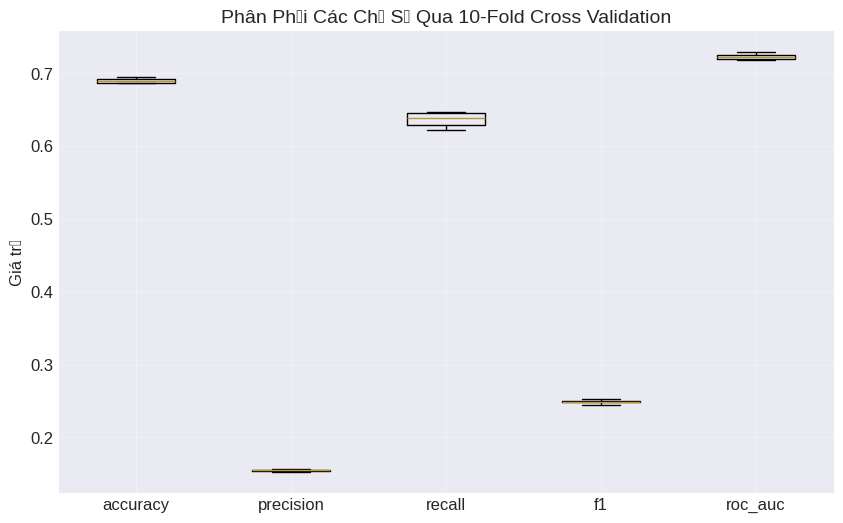


 ĐÁNH GIÁ ĐỘ ỔN ĐỊNH CỦA MÔ HÌNH:
ACCURACY    : Biến động 0.8% điểm
PRECISION   : Biến động 0.4% điểm
RECALL      : Biến động 2.5% điểm
F1          : Biến động 0.7% điểm
ROC_AUC     : Biến động 1.0% điểm

 CROSS-VALIDATION HOÀN TẤT


In [ ]:
# PHẦN 12: CROSS-VALIDATION (KHÔNG DATA LEAK)
print("PHẦN 12: CROSS-VALIDATION (k=10)")
print("THỰC HIỆN 10-FOLD CROSS VALIDATION (SMOTE trong từng fold)")

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Pipeline: SMOTE chỉ áp dụng cho train-fold
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        penalty='l1',
        class_weight='balanced',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ))
])

# Danh sách metrics cần đánh giá
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

print("\n KẾT QUẢ CROSS-VALIDATION (mean ± std):")
print("-" * 40)

results = {}

for metric_name, metric_scorer in scoring_metrics.items():
    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring=metric_scorer,
        n_jobs=-1
    )
    results[metric_name] = scores
    print(f"{metric_name.upper():12s}: {scores.mean():.4f} ± {scores.std():.4f}")

# Vẽ boxplot cho các metrics
plt.figure(figsize=(10, 6))
bp_data = [results[m] for m in scoring_metrics.keys()]
plt.boxplot(bp_data, labels=list(scoring_metrics.keys()))
plt.title('Phân Phối Các Chỉ Số Qua 10-Fold Cross Validation', fontsize=14)
plt.ylabel('Giá trị', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\n ĐÁNH GIÁ ĐỘ ỔN ĐỊNH CỦA MÔ HÌNH:")
for metric_name, scores in results.items():
    cv_range = (scores.max() - scores.min()) * 100
    print(f"{metric_name.upper():12s}: Biến động {cv_range:.1f}% điểm")

print("\n CROSS-VALIDATION HOÀN TẤT")
